# Weather Prediction System

>### IMPORTS : 

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

>### DATA CLEANING :

In [536]:
weather = pd.read_csv(r'climate_data.csv', index_col = 'Date')

In [537]:
weather.head(10)

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2009-01-01                      37.8                  35.0   
2009-01-02                      43.2                  32.0   
2009-01-03                      25.7                  60.0   
2009-01-04                       9.3                  67.0   
2009-01-05                      23.5                  30.0   
2009-01-06                      24.8                  42.0   
2009-01-07                      34.2                  60.0   
2009-01-08                      42.1                  41.0   
2009-01-09                      30.3                  46.0   
2009-01-10                      26.2                  38.0   

            Average dewpoint (°F)  Average barometer (in)  \
Date                                                        
2009-01-01                   12.7                    29.7   
2009-01-02                   14.7                    29.5   
2009-01-03                   12.7                    29.7   
2009-01-04                    0.1                    30.4   
2009-01-05                   -5.3                    29.9   
2009-01-06                    4.6                    29.8   
2009-01-07                   21.6                    29.7   
2009-01-08                   20.0                    29.8   
2009-01-09                   11.4                    30.0   
2009-01-10                    3.6                    30.4   

            Average windspeed (mph)  Average gustspeed (mph)  \
Date                                                           
2009-01-01                     26.4                     36.8   
2009-01-02                     12.8                     18.0   
2009-01-03                      8.3                     12.2   
2009-01-04                      2.9                      4.5   
2009-01-05                     16.7                     23.1   
2009-01-06                     16.0                     23.9   
2009-01-07                     20.4                     30.0   
2009-01-08                     17.5                     25.2   
2009-01-09                      6.9                     10.6   
2009-01-10                     18.2                     24.6   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2009-01-01                     274.0                      0.0   
2009-01-02                     240.0                      0.0   
2009-01-03                     290.0                      0.0   
2009-01-04                      47.0                      0.0   
2009-01-05                     265.0                      0.0   
2009-01-06                     276.0                      0.0   
2009-01-07                     276.0                      0.0   
2009-01-08                     265.0                      0.0   
2009-01-09                     292.0                      0.0   
2009-01-10                     258.0                      0.0   

            Rainfall for year (in)  Maximum rain per minute  ...  \
Date                                                         ...   
2009-01-01                     0.0                      0.0  ...   
2009-01-02                     0.0                      0.0  ...   
2009-01-03                     0.0                      0.0  ...   
2009-01-04                     0.0                      0.0  ...   
2009-01-05                     0.0                      0.0  ...   
2009-01-06                     0.0                      0.0  ...   
2009-01-07                     0.0                      0.0  ...   
2009-01-08                     0.0                      0.0  ...   
2009-01-09                     0.0                      0.0  ...   
2009-01-10                     0.0                      0.0  ...   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2009-01-01     

In [538]:
weather.columns

Index(['Average temperature (°F)', 'Average humidity (%)',
       'Average dewpoint (°F)', 'Average barometer (in)',
       'Average windspeed (mph)', 'Average gustspeed (mph)',
       'Average direction (°deg)', 'Rainfall for month (in)',
       'Rainfall for year (in)', 'Maximum rain per minute',
       'Maximum temperature (°F)', 'Minimum temperature (°F)',
       'Maximum humidity (%)', 'Minimum humidity (%)', 'Maximum pressure',
       'Minimum pressure', 'Maximum windspeed (mph)',
       'Maximum gust speed (mph)', 'Maximum heat index (°F)', 'Date1', 'Month',
       'diff_pressure'],
      dtype='object')

In [539]:
weather.shape

(3902, 22)

In [540]:
weather = weather.drop(['Rainfall for year (in)', 'Date1', 'Month', 'diff_pressure', 'Maximum rain per minute', 'Maximum heat index (°F)', 'Average dewpoint (°F)', 'Average gustspeed (mph)', 'Maximum gust speed (mph)'], axis = 1)

In [541]:
weather.apply(pd.isnull).sum()

Average temperature (°F)    0
Average humidity (%)        0
Average barometer (in)      0
Average windspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
dtype: int64

In [542]:
weather.dtypes

Average temperature (°F)    float64
Average humidity (%)        float64
Average barometer (in)      float64
Average windspeed (mph)     float64
Average direction (°deg)    float64
Rainfall for month (in)     float64
Maximum temperature (°F)    float64
Minimum temperature (°F)    float64
Maximum humidity (%)        float64
Minimum humidity (%)        float64
Maximum pressure            float64
Minimum pressure            float64
Maximum windspeed (mph)     float64
dtype: object

In [543]:
weather.index

Index(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04', '2009-01-05',
       '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-10',
       ...
       '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
       '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28'],
      dtype='object', name='Date', length=3902)

In [544]:
weather.index = pd.to_datetime(weather.index)

In [545]:
weather.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', name='Date', length=3902, freq=None)

In [546]:
weather.index.year.value_counts().sort_index()

2009    331
2010    361
2011    250
2012    337
2013    320
2014    357
2015    351
2016    366
2017    336
2018    324
2019    359
2020    210
Name: Date, dtype: int64

>### FILTERING OUTLIERS : 

>##### MAX TMPERATURE :

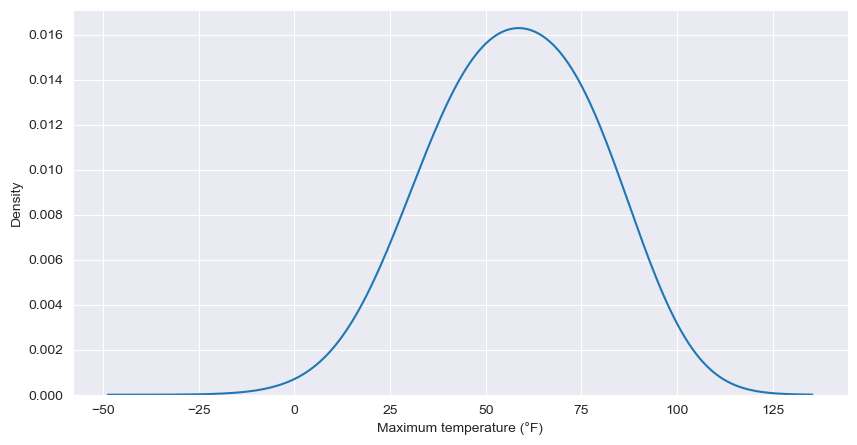

In [547]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Maximum temperature (°F)'], bw_method = .8)
plt.show()

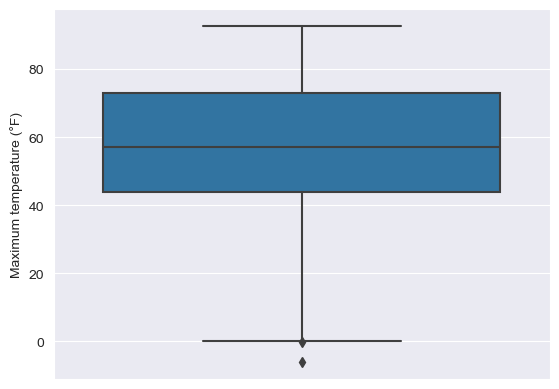

In [548]:
sns.boxplot( y='Maximum temperature (°F)', data=weather)
plt.show()

In [549]:
q3 = weather['Maximum temperature (°F)'].quantile(0.75)  
q1 =  weather['Maximum temperature (°F)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 29.300000000000004


In [550]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 117.15
Lower limit = -0.05000000000000426


In [551]:
weather['Maximum temperature (°F)'] = np.where(weather['Maximum temperature (°F)']> upper_limit, upper_limit,
                                      np.where(weather['Maximum temperature (°F)']< lower_limit, lower_limit,
                                      weather['Maximum temperature (°F)']))

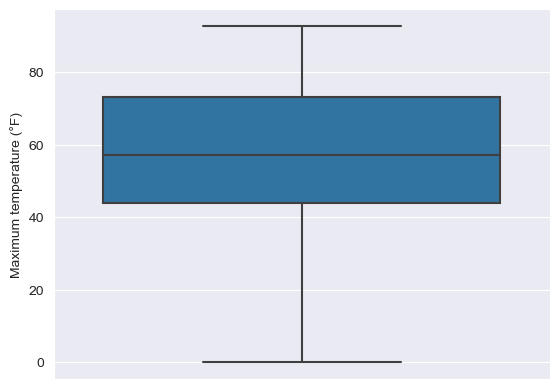

In [552]:
sns.boxplot( y='Maximum temperature (°F)', data=weather)
plt.show()

>##### MINIMUM TEMPERATURE :

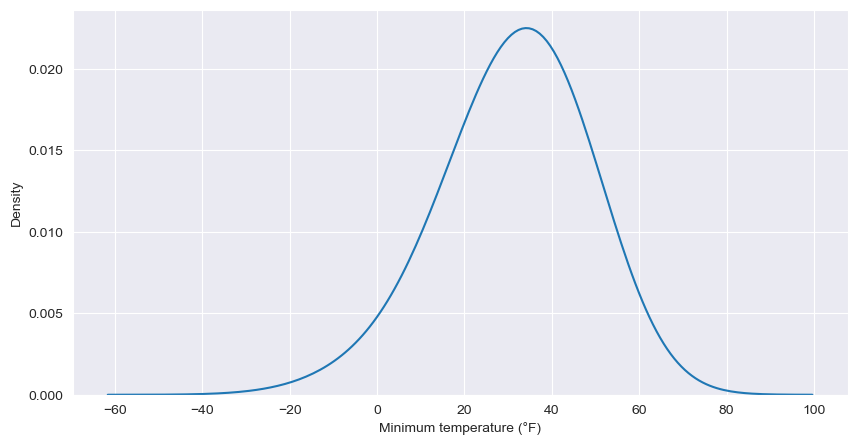

In [553]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Minimum temperature (°F)'], bw_method = .8)
plt.show()

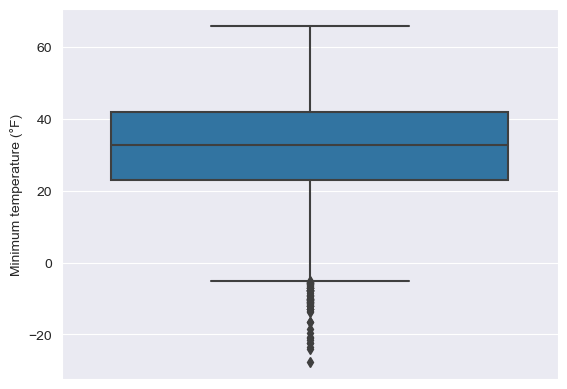

In [554]:
sns.boxplot( y='Minimum temperature (°F)', data=weather)
plt.show()

In [555]:
q3 = weather['Minimum temperature (°F)'].quantile(0.75)  
q1 =  weather['Minimum temperature (°F)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 18.799999999999997


In [556]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 70.0
Lower limit = -5.199999999999996


In [557]:
weather['Minimum temperature (°F)'] = np.where(weather['Minimum temperature (°F)']> upper_limit, upper_limit,
                                      np.where(weather['Minimum temperature (°F)']< lower_limit, lower_limit,
                                      weather['Minimum temperature (°F)']))

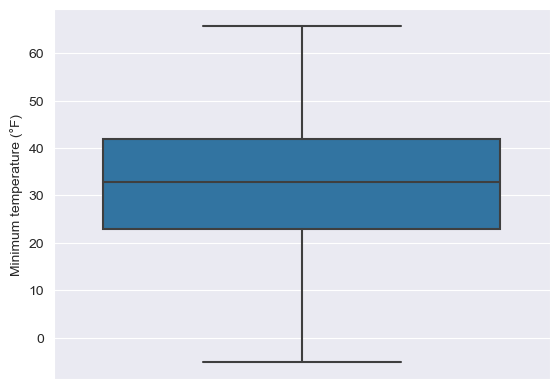

In [558]:
sns.boxplot( y='Minimum temperature (°F)', data=weather)
plt.show()

>##### AVERAGE TEMPERATURE :

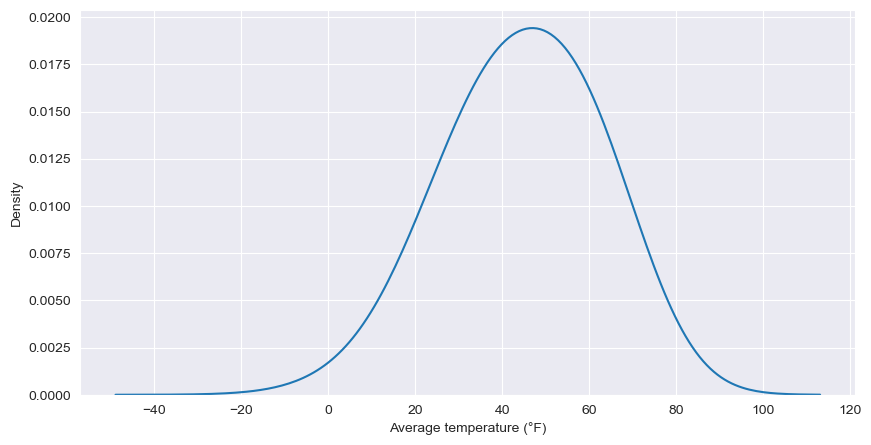

In [559]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Average temperature (°F)'], bw_method = .8)
plt.show()

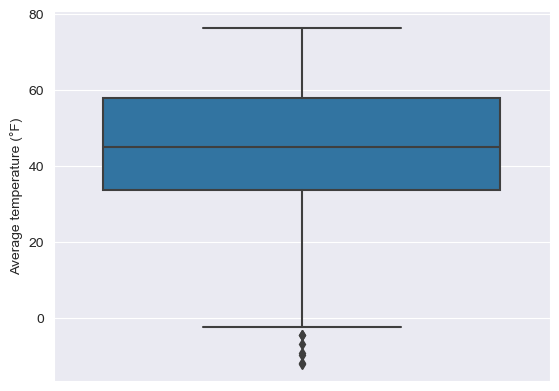

In [560]:
sns.boxplot( y='Average temperature (°F)', data=weather)
plt.show()

In [561]:
q3 = weather['Average temperature (°F)'].quantile(0.75)  
q1 =  weather['Average temperature (°F)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 24.299999999999997


In [562]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 94.44999999999999
Lower limit = -2.749999999999993


In [563]:
weather['Average temperature (°F)'] = np.where(weather['Average temperature (°F)']> upper_limit, upper_limit,
                                      np.where(weather['Average temperature (°F)']< lower_limit, lower_limit,
                                      weather['Average temperature (°F)']))

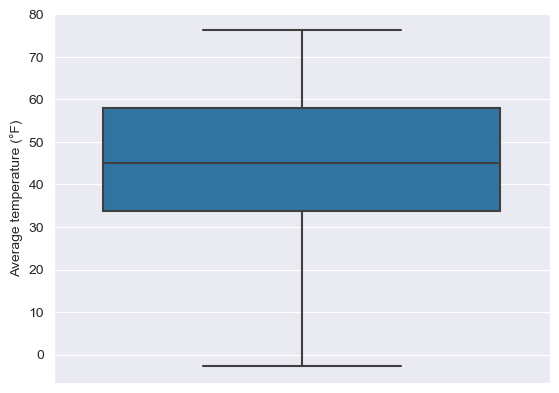

In [564]:
sns.boxplot( y='Average temperature (°F)', data=weather)
plt.show()

>##### MAXIMUM HUMIDITY :

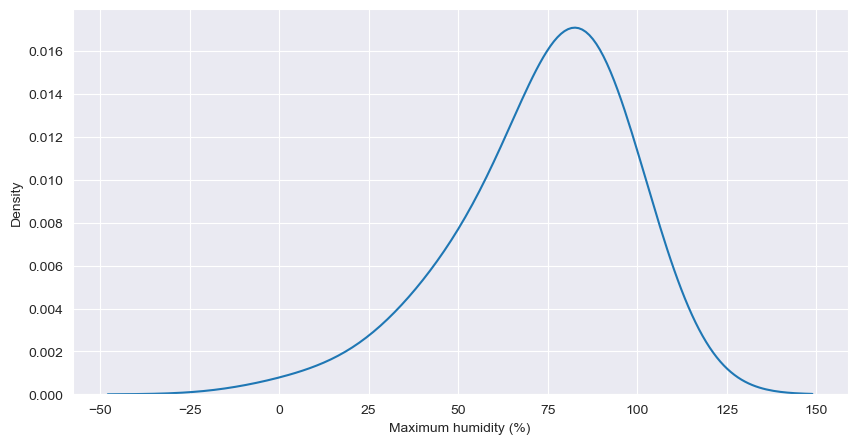

In [565]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Maximum humidity (%)'], bw_method = .8)
plt.show()

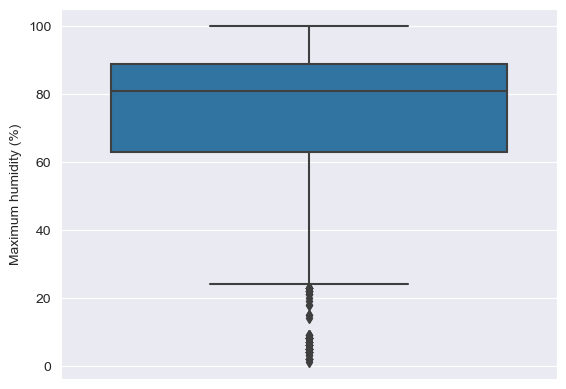

In [566]:
sns.boxplot( y='Maximum humidity (%)', data=weather)
plt.show()

In [567]:
q3 = weather['Maximum humidity (%)'].quantile(0.75)  
q1 =  weather['Maximum humidity (%)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 26.0


In [568]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 128.0
Lower limit = 24.0


In [569]:
weather['Maximum humidity (%)'] = np.where(weather['Maximum humidity (%)']> upper_limit, upper_limit,
                                      np.where(weather['Maximum humidity (%)']< lower_limit, lower_limit,
                                      weather['Maximum humidity (%)']))

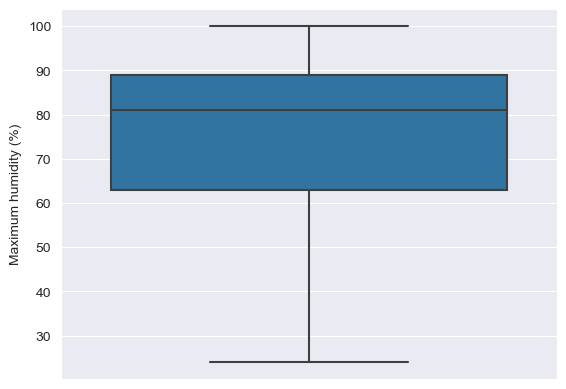

In [570]:
sns.boxplot( y='Maximum humidity (%)', data=weather)
plt.show()

>##### MINIMIM HUMIDITY :

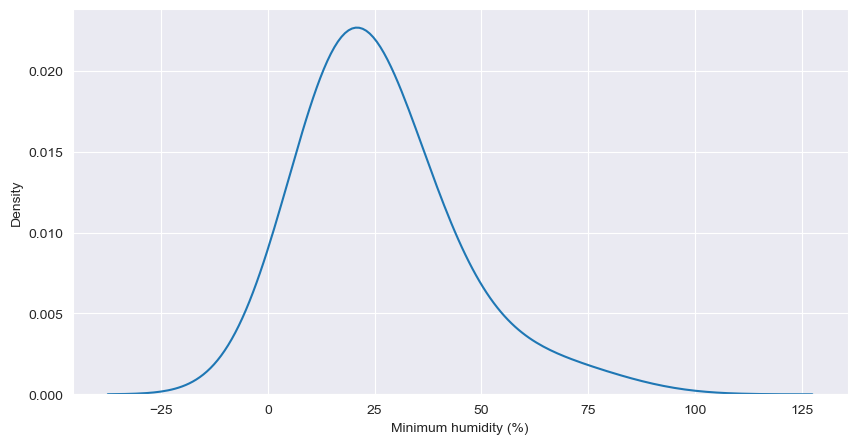

In [571]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Minimum humidity (%)'], bw_method = .8)
plt.show()

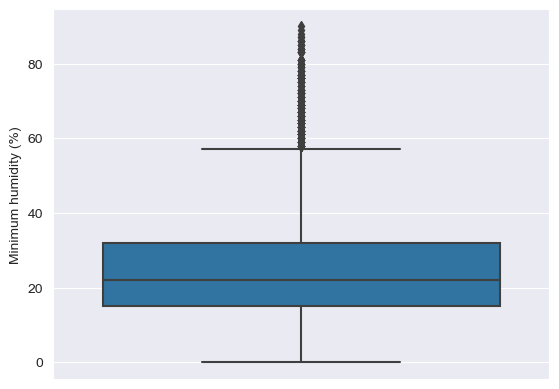

In [572]:
sns.boxplot( y='Minimum humidity (%)', data=weather)
plt.show()

In [573]:
q3 = weather['Minimum humidity (%)'].quantile(0.75)  
q1 =  weather['Minimum humidity (%)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 17.0


In [574]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 57.5
Lower limit = -10.5


In [575]:
weather['Minimum humidity (%)'] = np.where(weather['Minimum humidity (%)']> upper_limit, upper_limit,
                                      np.where(weather['Minimum humidity (%)']< lower_limit, lower_limit,
                                      weather['Minimum humidity (%)']))

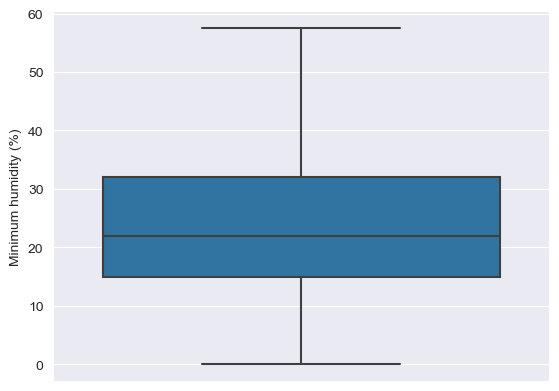

In [576]:
sns.boxplot( y='Minimum humidity (%)', data=weather)
plt.show()

>##### AVERAGE HUMIDITY :

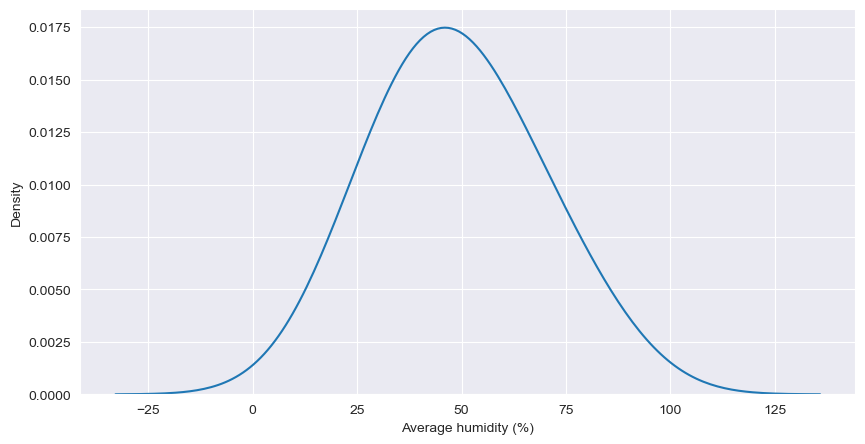

In [577]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Average humidity (%)'], bw_method = .8)
plt.show()

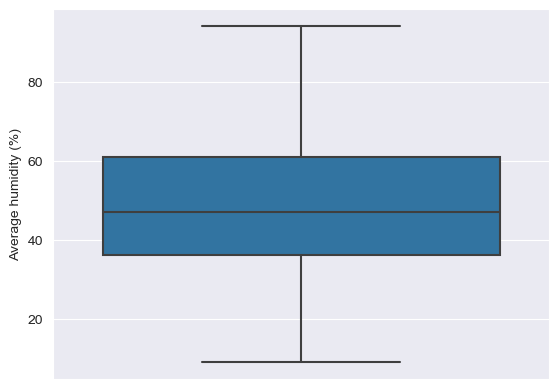

In [578]:
sns.boxplot( y='Average humidity (%)', data=weather)
plt.show()

>##### MAXIMUM PRESSURE :

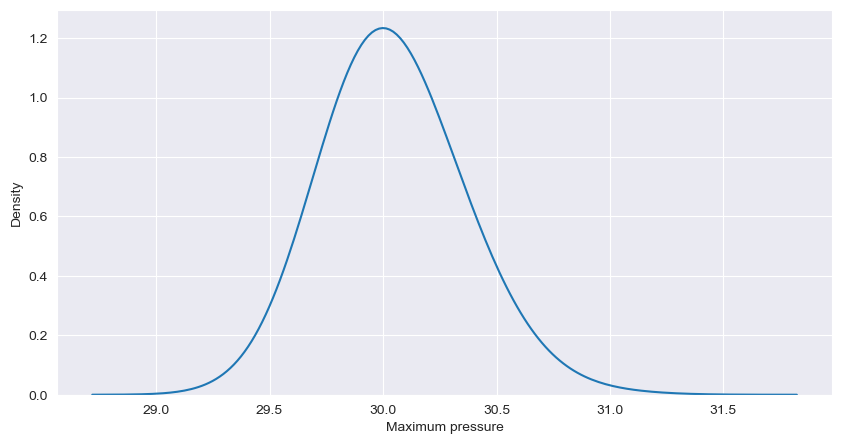

In [579]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Maximum pressure'], bw_method = .8)
plt.show()

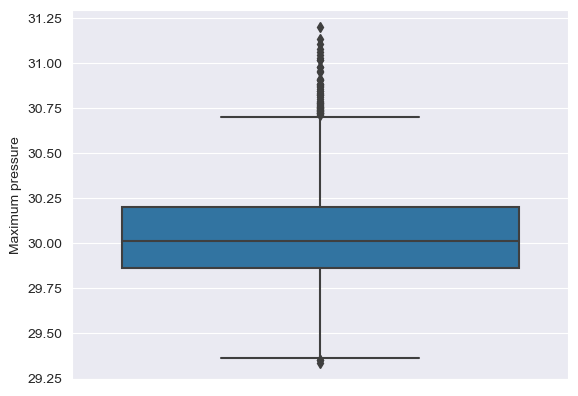

In [580]:
sns.boxplot( y='Maximum pressure', data=weather)
plt.show()

In [581]:
q3 = weather['Maximum pressure'].quantile(0.75)  
q1 =  weather['Maximum pressure'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 0.33699999999999974


In [582]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 30.7085
Lower limit = 29.360500000000002


In [583]:
weather['Maximum pressure'] = np.where(weather['Maximum pressure']> upper_limit, upper_limit,
                                      np.where(weather['Maximum pressure']< lower_limit, lower_limit,
                                      weather['Maximum pressure']))

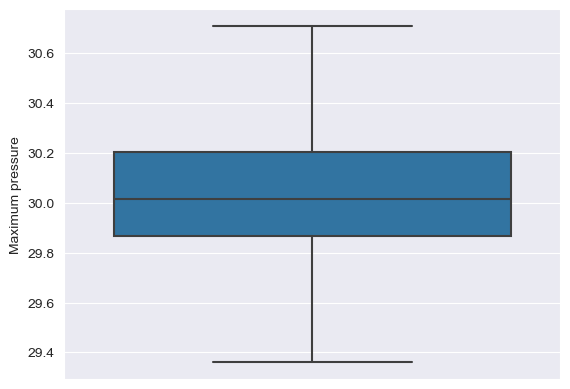

In [584]:
sns.boxplot( y='Maximum pressure', data=weather)
plt.show()

>##### MINIMUM PRESSURE :

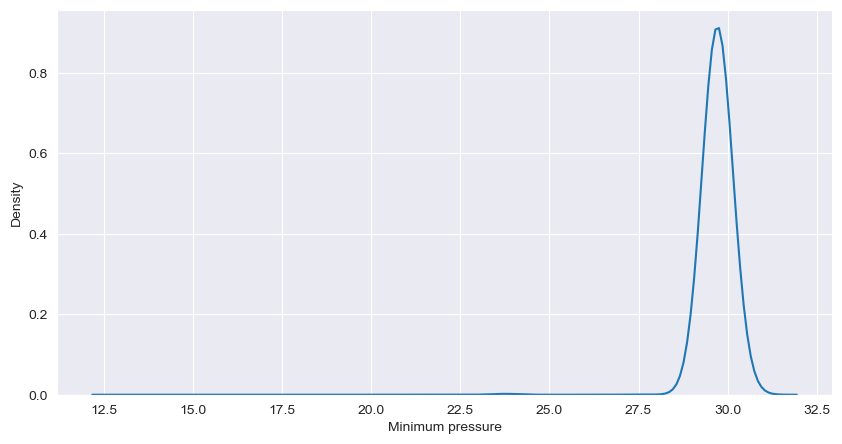

In [585]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Minimum pressure'], bw_method = .8)
plt.show()

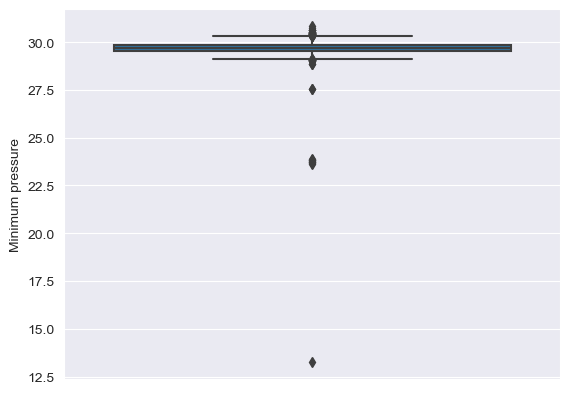

In [586]:
sns.boxplot( y='Minimum pressure', data=weather)
plt.show()

In [587]:
q3 = weather['Minimum pressure'].quantile(0.75)  
q1 =  weather['Minimum pressure'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 0.3069999999999986


In [588]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 30.329499999999996
Lower limit = 29.1015


In [589]:
weather['Minimum pressure'] = np.where(weather['Minimum pressure']> upper_limit, upper_limit,
                                      np.where(weather['Minimum pressure']< lower_limit, lower_limit,
                                      weather['Minimum pressure']))

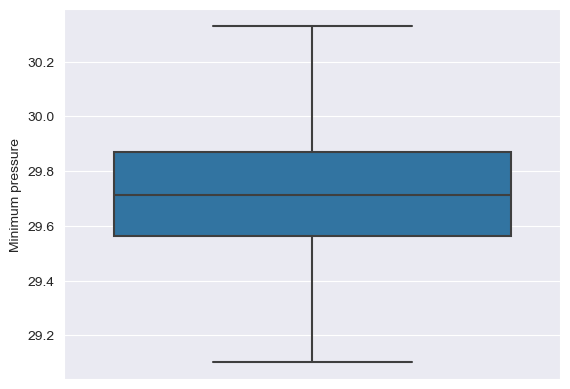

In [590]:
sns.boxplot( y='Minimum pressure', data=weather)
plt.show()

>##### AVERAGE PRESSURE :

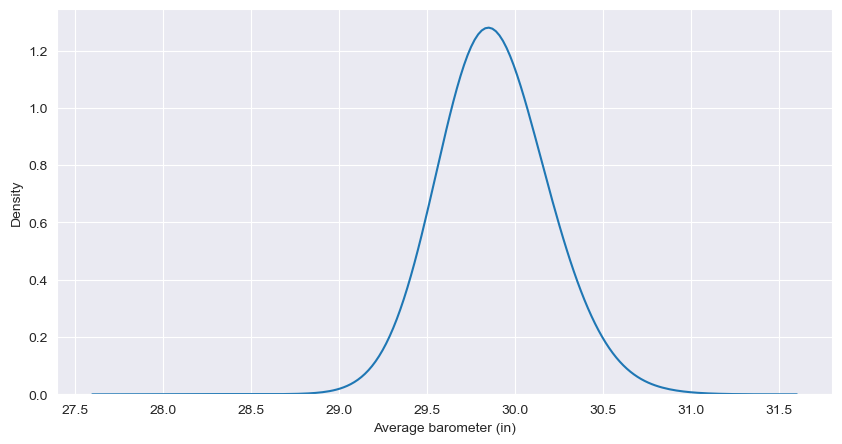

In [591]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Average barometer (in)'], bw_method = .8)
plt.show()

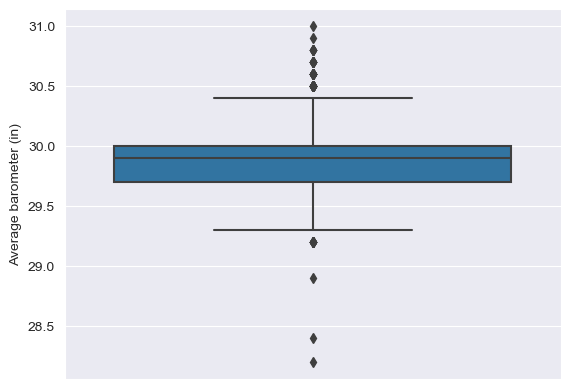

In [592]:
sns.boxplot( y='Average barometer (in)', data=weather)
plt.show()

In [593]:
q3 = weather['Average barometer (in)'].quantile(0.75)  
q1 =  weather['Average barometer (in)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 0.3000000000000007


In [594]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 30.450000000000003
Lower limit = 29.25


In [595]:
weather['Average barometer (in)'] = np.where(weather['Average barometer (in)']> upper_limit, upper_limit,
                                      np.where(weather['Average barometer (in)']< lower_limit, lower_limit,
                                      weather['Average barometer (in)']))

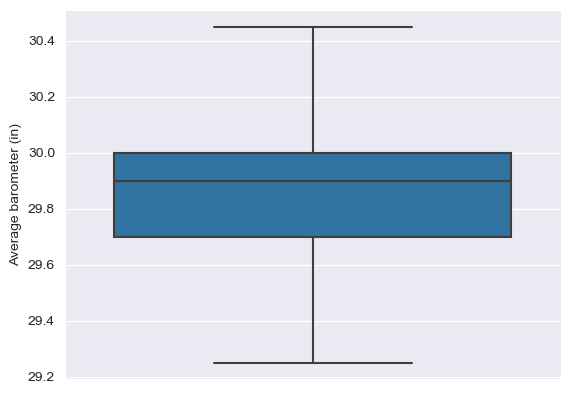

In [596]:
sns.boxplot( y='Average barometer (in)', data=weather)
plt.show()

>##### MAXIMUM WINDSPEED :

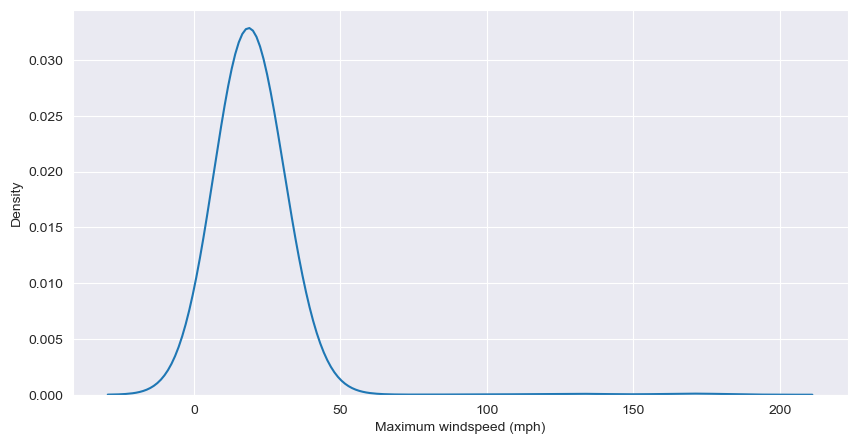

In [597]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Maximum windspeed (mph)'], bw_method = .8)
plt.show()

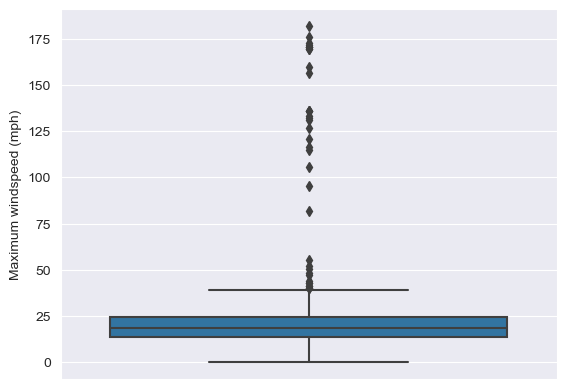

In [598]:
sns.boxplot( y='Maximum windspeed (mph)', data=weather)
plt.show()

In [599]:
q3 = weather['Maximum windspeed (mph)'].quantile(0.75)  
q1 =  weather['Maximum windspeed (mph)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 10.399999999999999


In [600]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 39.8
Lower limit = -1.7999999999999972


In [601]:
weather['Maximum windspeed (mph)'] = np.where(weather['Maximum windspeed (mph)']> upper_limit, upper_limit,
                                      np.where(weather['Maximum windspeed (mph)']< lower_limit, lower_limit,
                                      weather['Maximum windspeed (mph)']))

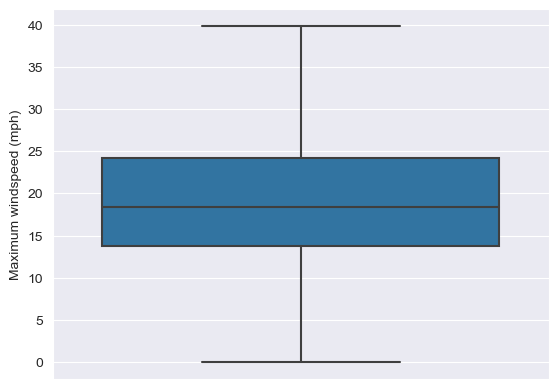

In [602]:
sns.boxplot( y='Maximum windspeed (mph)', data=weather)
plt.show()

>##### AVERAGE WINDSPEED :

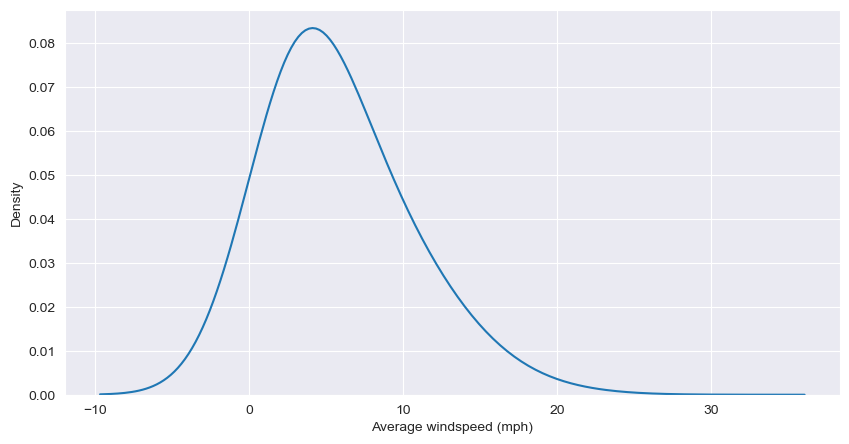

In [603]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Average windspeed (mph)'], bw_method = .8)
plt.show()

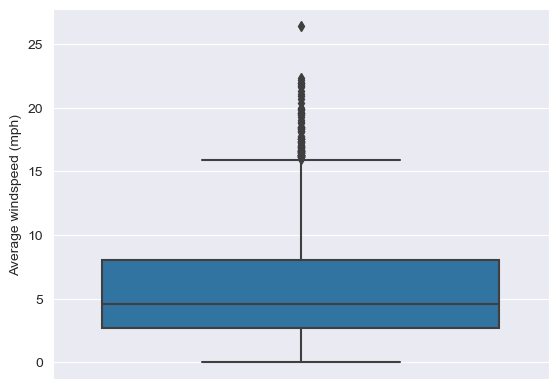

In [604]:
sns.boxplot( y='Average windspeed (mph)', data=weather)
plt.show()

In [605]:
q3 = weather['Average windspeed (mph)'].quantile(0.75)  
q1 =  weather['Average windspeed (mph)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 5.3


In [606]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 15.95
Lower limit = -5.249999999999999


In [607]:
weather['Average windspeed (mph)'] = np.where(weather['Average windspeed (mph)']> upper_limit, upper_limit,
                                      np.where(weather['Average windspeed (mph)']< lower_limit, lower_limit,
                                      weather['Average windspeed (mph)']))

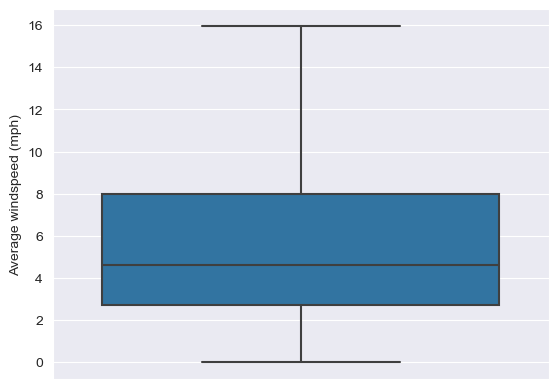

In [608]:
sns.boxplot( y='Average windspeed (mph)', data=weather)
plt.show()

>##### AVERAGE WIND DIRECTION :

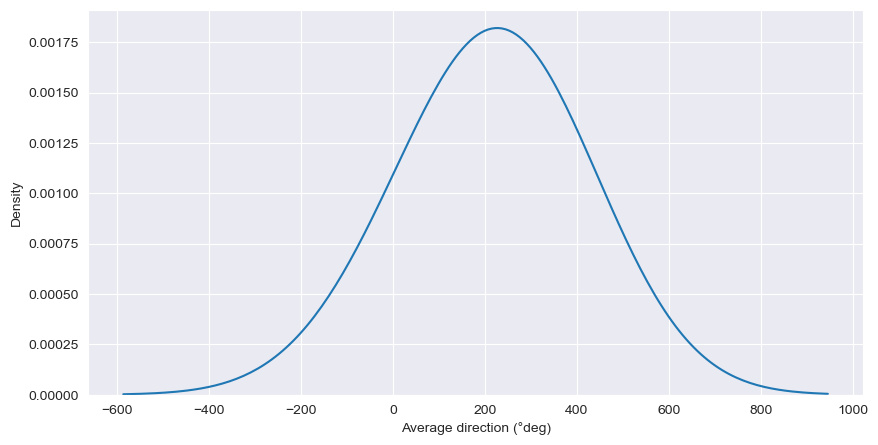

In [609]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Average direction (°deg)'], bw_method = 2)
plt.show()

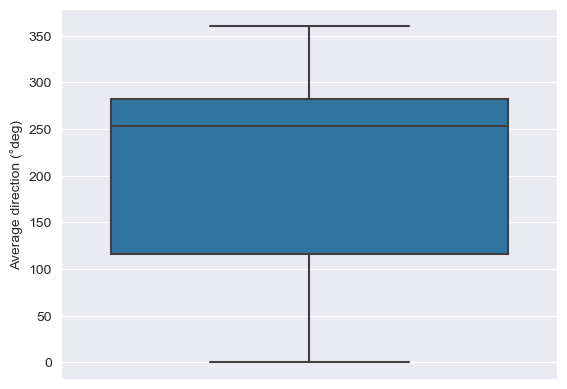

In [610]:
sns.boxplot( y='Average direction (°deg)', data=weather)
plt.show()

>##### MONTHLY RAINFALL :

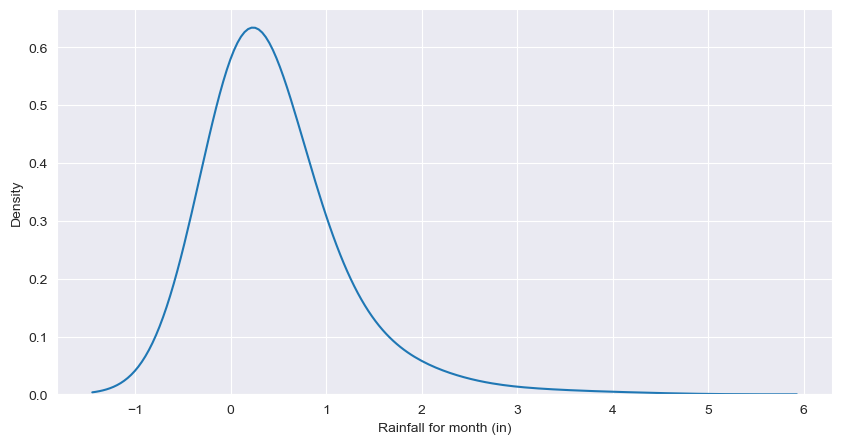

In [611]:
plt.figure(figsize = (10,5))
sns.kdeplot(weather['Rainfall for month (in)'], bw_method = .8)
plt.show()

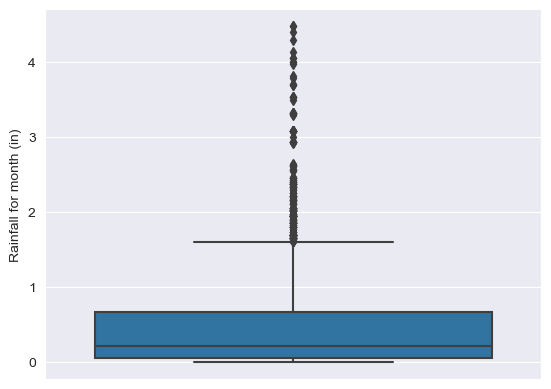

In [612]:
sns.boxplot( y='Rainfall for month (in)', data=weather)
plt.show()

In [613]:
q3 = weather['Rainfall for month (in)'].quantile(0.75)  
q1 =  weather['Rainfall for month (in)'].quantile(0.25)
IQR = q3 - q1
print(f'IQR = {IQR}')

IQR = 0.62


In [614]:
upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
print(f'Upper limit = {upper_limit}\nLower limit = {lower_limit}')

Upper limit = 1.6
Lower limit = -0.8799999999999999


In [615]:
weather['Rainfall for month (in)'] = np.where(weather['Rainfall for month (in)']> upper_limit, upper_limit,
                                      np.where(weather['Rainfall for month (in)']< lower_limit, lower_limit,
                                      weather['Rainfall for month (in)']))

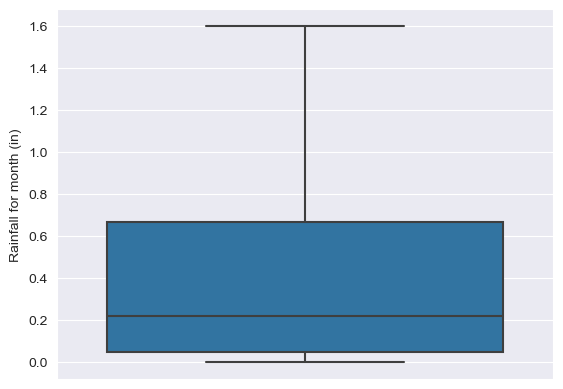

In [616]:
sns.boxplot( y='Rainfall for month (in)', data=weather)
plt.show()

>### PREDICTING MAXIMUM TEMPERATURE :

>##### DATA PREPROCESSING :

In [617]:
weather['Max_temp_target'] = weather.shift(-1)['Maximum temperature (°F)']

In [618]:
weather = weather.ffill()

In [619]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  
Date                                                                    
2020-07-24            29.577                     15.0             69.2  
2020-07-25            29.645                      8.1             71.9  
2020-07-26            29.745                     11.5             77.3  
2020-07-27            29.781                     13.8             75.6  
2020-07-28            29.675                     17.3             75.6

>##### IMPLEMENTING RIDGE REGRESSION :

In [620]:
ridge_reg = Ridge(alpha = 0.1)

In [621]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Maximum temperature (°F'])]

In [622]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Max_temp_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Max_temp_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [623]:
max_temp_predictions = back_testing(weather, ridge_reg, predictors)

In [624]:
max_temp_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    36.2   36.199999  8.215173e-07
2015-01-02    34.4   34.400003  3.417393e-06
2015-01-03    33.1   33.100001  7.725351e-07
2015-01-04    46.8   46.799993  7.385853e-06
2015-01-05    49.5   49.500003  2.522860e-06
...            ...         ...           ...
2020-07-24    69.2   69.200003  2.707297e-06
2020-07-25    71.9   71.900000  1.175706e-07
2020-07-26    77.3   77.299999  8.266110e-07
2020-07-27    75.6   75.600001  1.240263e-06
2020-07-28    75.6   75.600000  3.062590e-07

[1946 rows x 3 columns]

In [625]:
mean_absolute_error(max_temp_predictions['Actual'], max_temp_predictions['Prediction'])

3.9601666879039245e-06

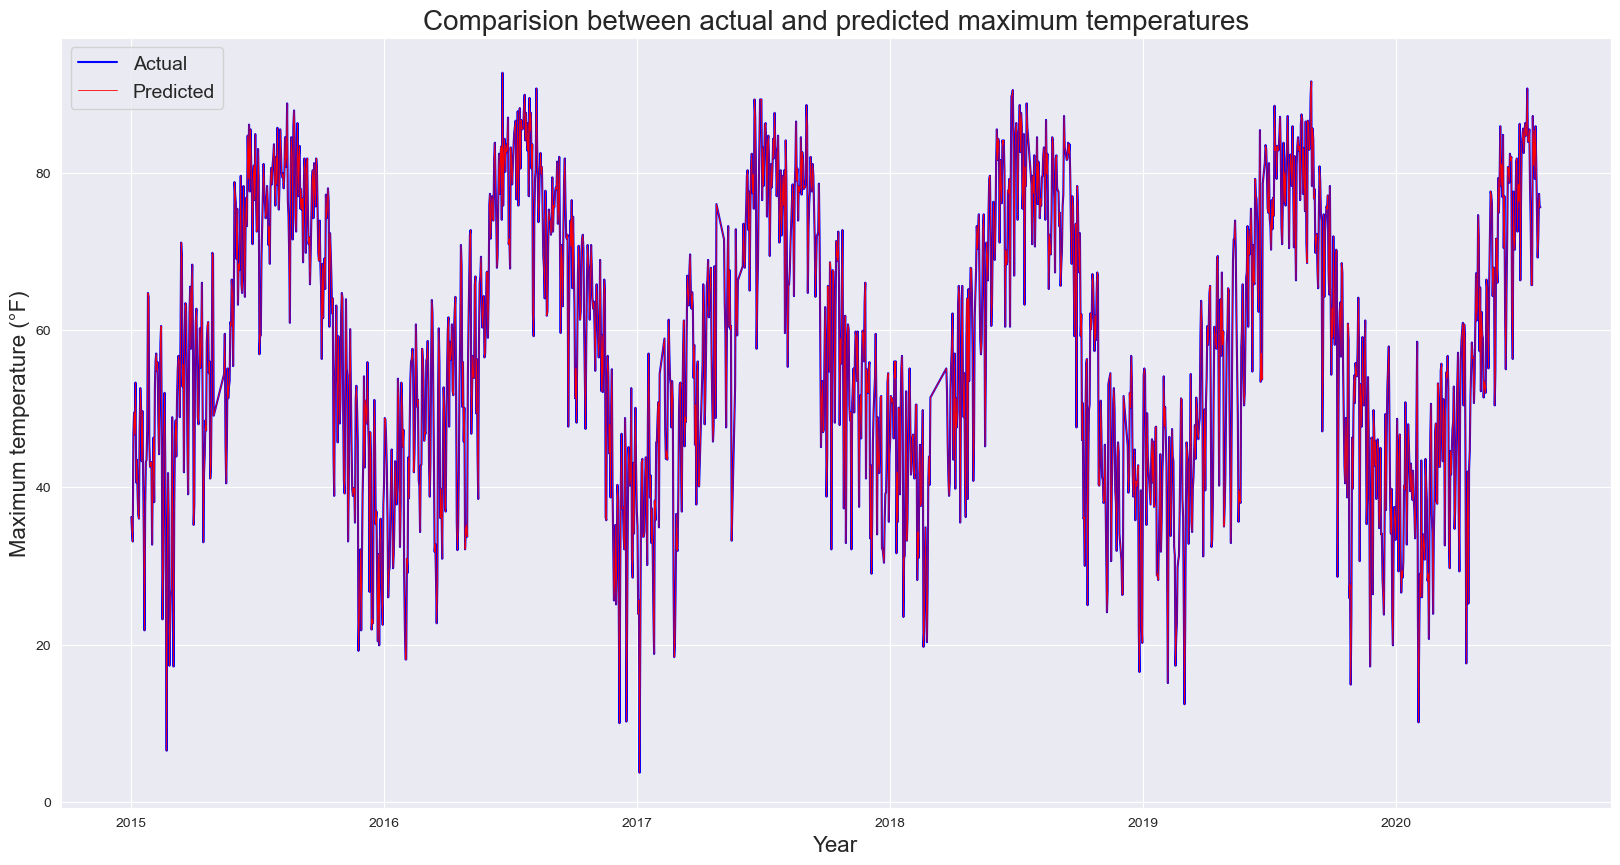

In [626]:
plt.figure(figsize = (20, 10))
plt.plot(max_temp_predictions.index, max_temp_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(max_temp_predictions.index, max_temp_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Maximum temperature (°F)', fontsize = 16)
plt.title('Comparision between actual and predicted maximum temperatures', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING MINIMUM TEMPERATURE : 

>##### DATA PREPROCESSING :

In [627]:
weather['Min_temp_target'] = weather.shift(-1)['Minimum temperature (°F)']

In [628]:
weather = weather.ffill()

In [629]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  
Date                         
2020-07-24             55.1  
2020-07-25             50.5  
2020-07-26             43.6  
2020-07-27             46.0  
2020-07-28             46.0

>##### IMPLEMENTING RIDGE REGRESSION :

In [630]:
ridge_reg = Ridge(alpha = 0.1)

In [631]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Minimum temperature (°F'])]

In [632]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Min_temp_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Min_temp_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [633]:
min_temp_predictions = back_testing(weather, ridge_reg, predictors)

In [634]:
min_temp_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01     8.8    8.799998  1.787041e-06
2015-01-02     7.9    7.900005  4.543813e-06
2015-01-03    12.3   12.299999  9.562497e-07
2015-01-04    32.2   32.199986  1.399465e-05
2015-01-05    40.3   40.299989  1.149912e-05
...            ...         ...           ...
2020-07-24    55.1   55.099994  5.629559e-06
2020-07-25    50.5   50.499997  3.471340e-06
2020-07-26    43.6   43.600001  1.144798e-06
2020-07-27    46.0   45.999999  1.238295e-06
2020-07-28    46.0   45.999999  6.488309e-07

[1946 rows x 3 columns]

In [635]:
mean_absolute_error(min_temp_predictions['Actual'], min_temp_predictions['Prediction'])

4.208517316418729e-06

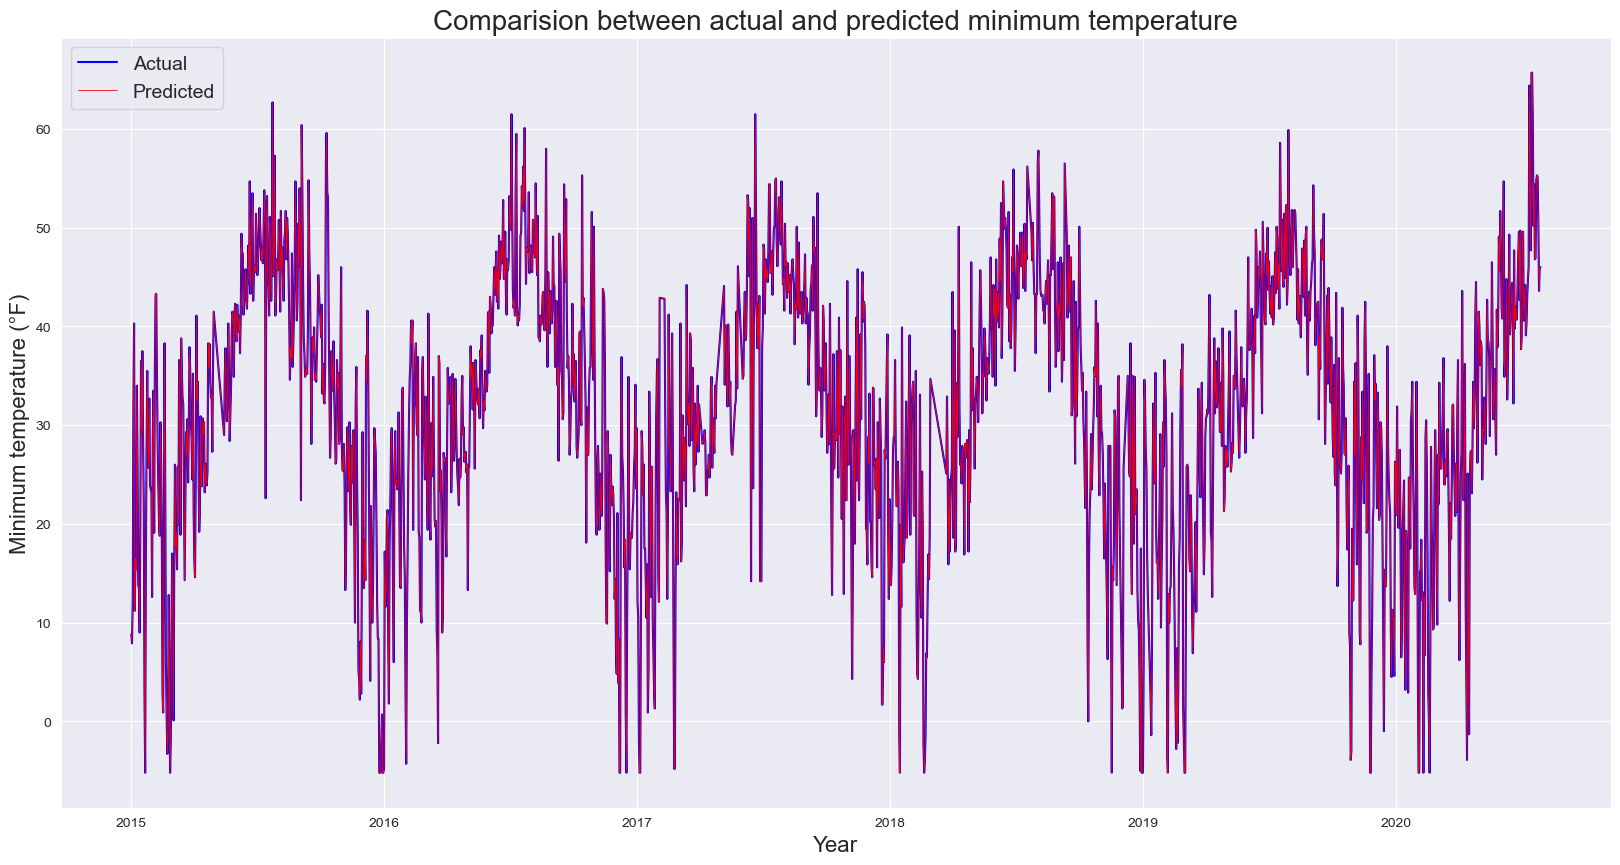

In [636]:
plt.figure(figsize = (20, 10))
plt.plot(min_temp_predictions.index, min_temp_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(min_temp_predictions.index, min_temp_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Minimum temperature (°F)', fontsize = 16)
plt.title('Comparision between actual and predicted minimum temperature', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING AVERAGE TEMPERATURE :

>##### DATA PREPROCESSING :

In [637]:
weather['Avg_temp_target'] = weather.shift(-1)['Average temperature (°F)']

In [638]:
weather = weather.ffill()

In [639]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  Avg_temp_target  
Date                                          
2020-07-24             55.1             62.8  
2020-07-25             50.5             60.6  
2020-07-26             43.6             61.7  
2020-07-27             46.0             60.5  
2020-07-28             46.0             60.5

>##### IMPLEMETING RIDGE REGRESSSION : 

In [640]:
rigid_reg = Ridge(alpha = 0.1)

In [641]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Average temperature (°F'])]

In [642]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Avg_temp_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Avg_temp_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [643]:
avg_temp_predictions = back_testing(weather, ridge_reg, predictors)

In [644]:
avg_temp_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    20.8   20.800021  2.119921e-05
2015-01-02    24.2   24.199967  3.325390e-05
2015-01-03    26.4   26.399954  4.551834e-05
2015-01-04    38.9   38.899997  3.057806e-06
2015-01-05    44.0   44.000000  5.307859e-08
...            ...         ...           ...
2020-07-24    62.8   62.799990  1.035596e-05
2020-07-25    60.6   60.599999  1.298842e-06
2020-07-26    61.7   61.699993  7.419464e-06
2020-07-27    60.5   60.500000  1.110719e-08
2020-07-28    60.5   60.500001  7.559808e-07

[1946 rows x 3 columns]

In [645]:
mean_absolute_error(avg_temp_predictions['Actual'], avg_temp_predictions['Prediction'])

1.2716926861957833e-05

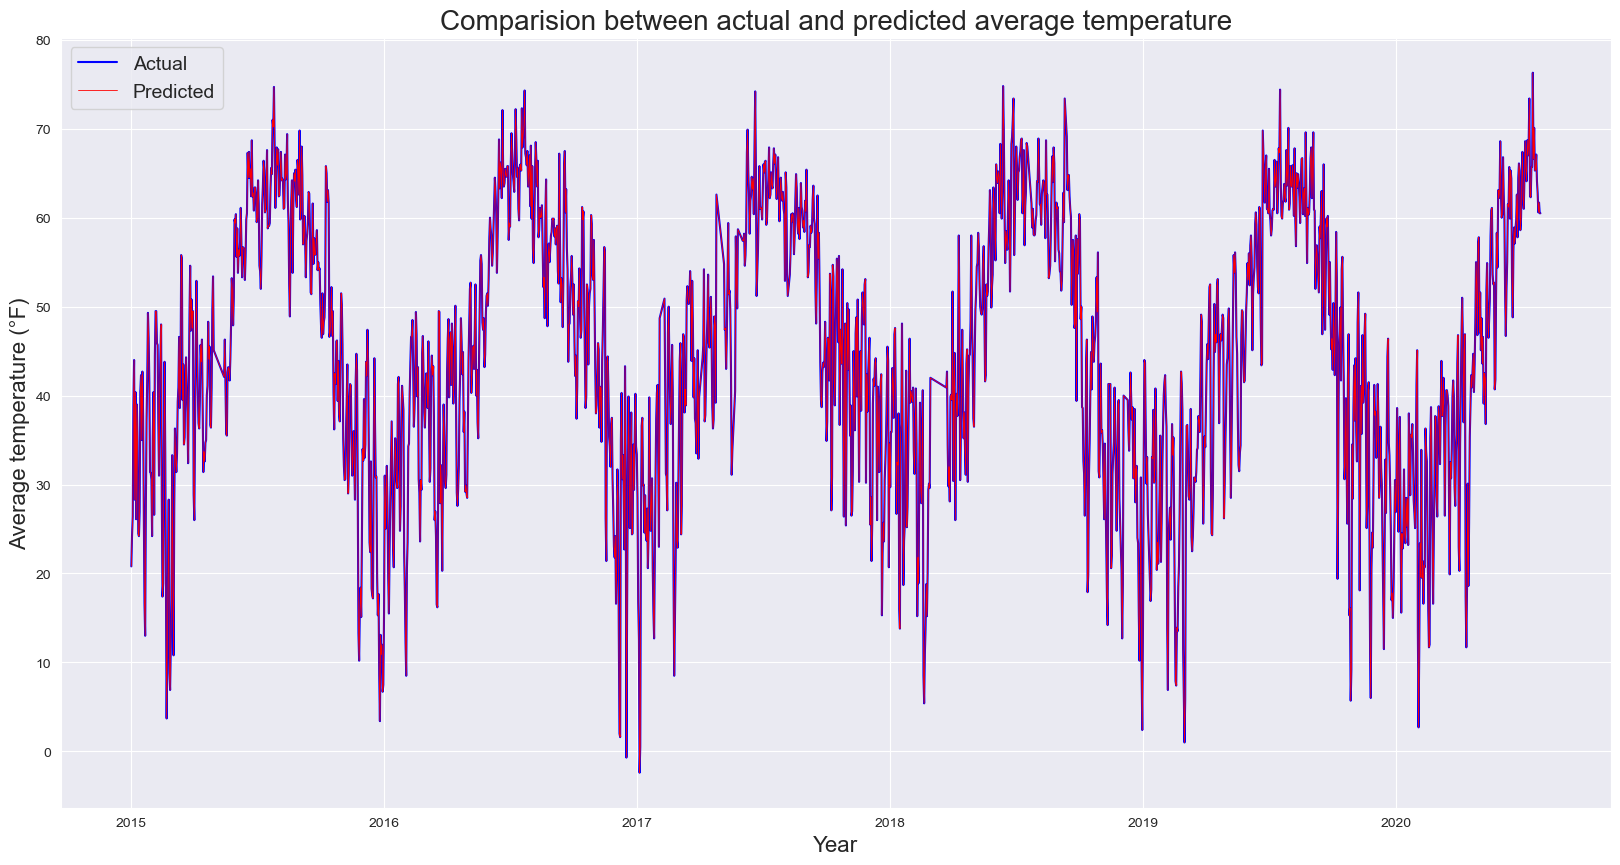

In [646]:
plt.figure(figsize = (20, 10))
plt.plot(avg_temp_predictions.index, avg_temp_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(avg_temp_predictions.index, avg_temp_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average temperature (°F)', fontsize = 16)
plt.title('Comparision between actual and predicted average temperature', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

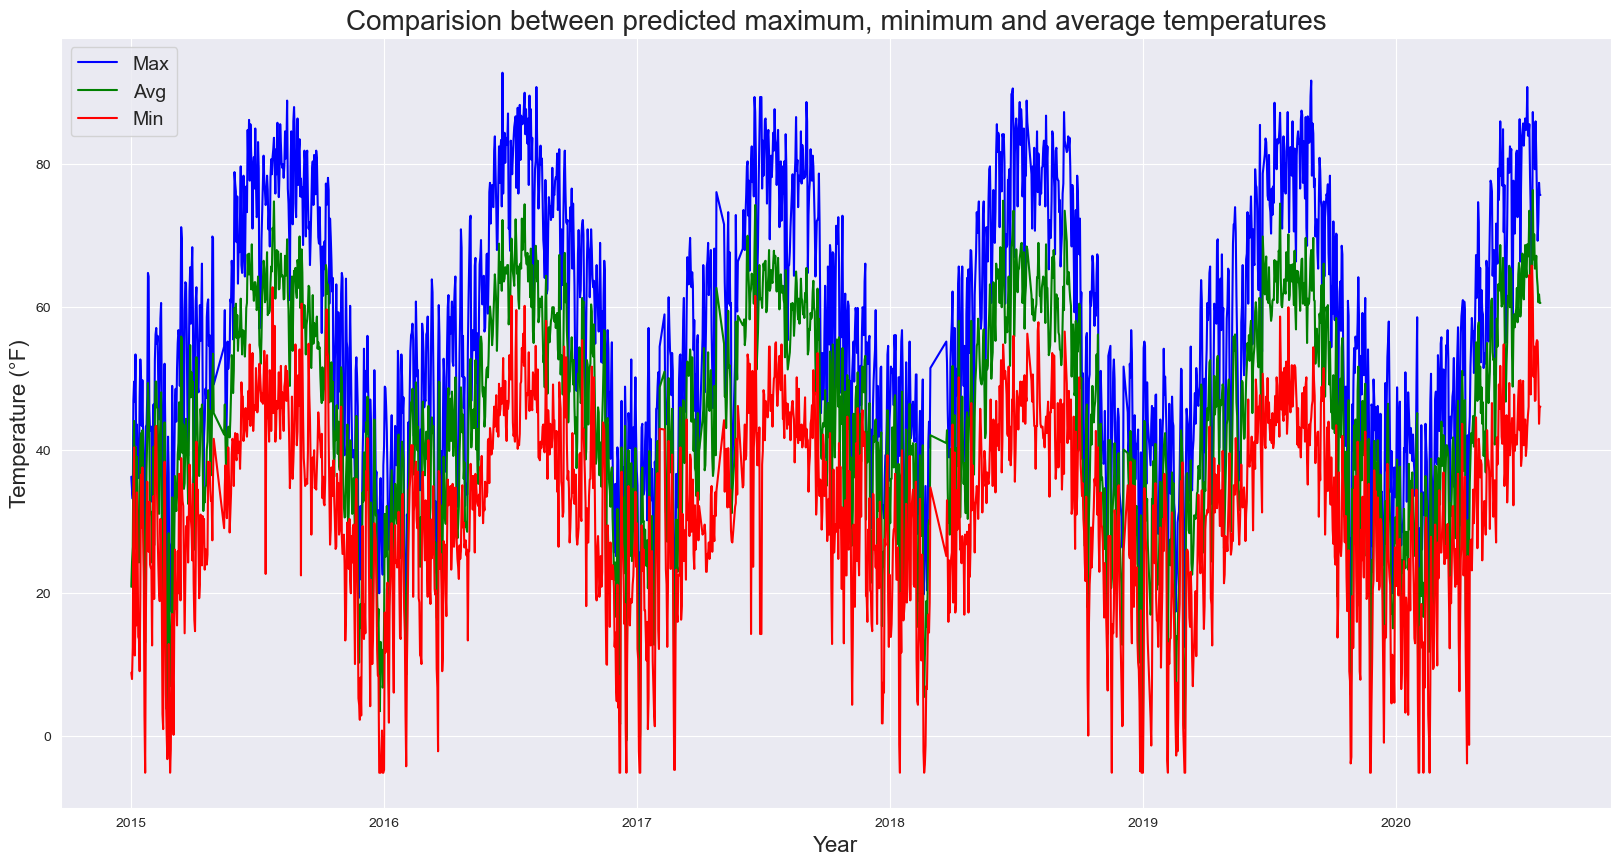

In [647]:
plt.figure(figsize = (20, 10))
plt.plot(avg_temp_predictions.index, max_temp_predictions['Prediction'], color = 'blue', label = 'Max')
plt.plot(avg_temp_predictions.index, avg_temp_predictions['Prediction'], color = 'green',  label = 'Avg')
plt.plot(avg_temp_predictions.index, min_temp_predictions['Prediction'], color = 'red', label = 'Min')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature (°F)', fontsize = 16)
plt.title('Comparision between predicted maximum, minimum and average temperatures', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICITNG MAXIMUM HUMIDITY :

>##### DATA PREPROCESSING :

In [648]:
weather['Max_humidity_target'] = weather.shift(-1)['Maximum humidity (%)']

In [649]:
weather = weather.ffill()

In [650]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  Avg_temp_target  Max_humidity_target  
Date                                                               
2020-07-24             55.1             62.8                 90.0  
2020-07-25             50.5             60.6                 90.0  
2020-07-26             43.6             61.7                 96.0  
2020-07-27             46.0             60.5                 94.0  
2020-07-28             46.0             60.5                 94.0

>##### IMPLEMETING RIDGE REGRESSSION : 

In [651]:
rigid_reg = Ridge(alpha = 0.1)

In [652]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Maximum humidity (%)'])]

In [653]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Max_humidity_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Max_humidity_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [654]:
max_humidity_predictions = back_testing(weather, ridge_reg, predictors)

In [655]:
max_humidity_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    80.0   79.999998  2.381391e-06
2015-01-02    79.0   78.999999  1.230811e-06
2015-01-03    77.0   76.999999  1.220793e-06
2015-01-04    71.0   70.999995  5.488523e-06
2015-01-05    58.0   57.999999  1.038598e-06
...            ...         ...           ...
2020-07-24    90.0   89.999999  1.319959e-06
2020-07-25    90.0   89.999999  1.067203e-06
2020-07-26    96.0   95.999999  9.570317e-07
2020-07-27    94.0   93.999999  7.259887e-07
2020-07-28    94.0   93.999999  8.855822e-07

[1946 rows x 3 columns]

In [656]:
mean_absolute_error(max_humidity_predictions['Actual'], max_humidity_predictions['Prediction'])

1.6909057919299343e-06

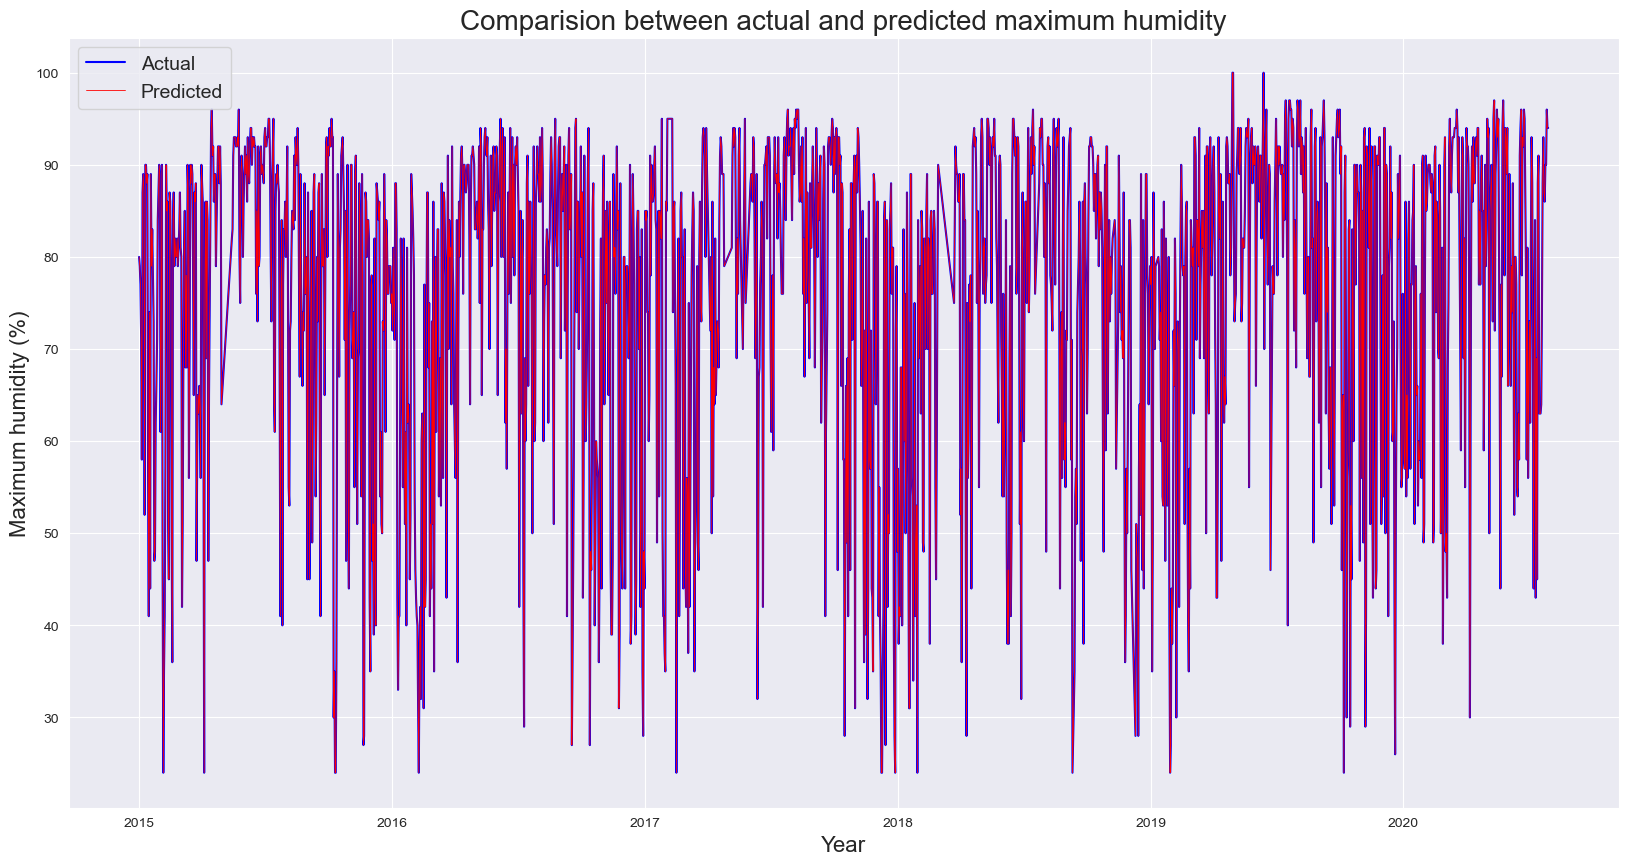

In [657]:
plt.figure(figsize = (20, 10))
plt.plot(max_humidity_predictions.index, max_humidity_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(max_humidity_predictions.index, max_humidity_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Maximum humidity (%)', fontsize = 16)
plt.title('Comparision between actual and predicted maximum humidity', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING MINIMUM HUMIDITY :

> ##### DATA PREPROCESSING

In [658]:
weather['Min_humidity_target'] = weather.shift(-1)['Minimum humidity (%)']

In [659]:
weather = weather.ffill()

In [660]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  Avg_temp_target  Max_humidity_target  \
Date                                                                
2020-07-24             55.1             62.8                 90.0   
2020-07-25             50.5             60.6                 90.0   
2020-07-26             43.6             61.7                 96.0   
2020-07-27             46.0             60.5                 94.0   
2020-07-28             46.0             60.5                 94.0   

            Min_humidity_target  
Date                             
2020-07-24                 36.0  
2020-07-25                 40.0  
2020-07-26                 35.0  
2020-07-27                 35.0  
2020-07-28                 35.0

>##### IMPLEMENTATION OF RIGID REGRESSION :

In [661]:
ridge_reg = Ridge(alpha = 0.1)

In [662]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Minimum humidity (%)'])]

In [663]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Min_humidity_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Min_humidity_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [664]:
min_humidity_predictions = back_testing(weather, ridge_reg, predictors)

In [665]:
min_humidity_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    34.0   33.999997  3.376551e-06
2015-01-02    43.0   42.999991  9.325161e-06
2015-01-03    36.0   35.999996  4.049051e-06
2015-01-04    39.0   38.999991  9.347354e-06
2015-01-05    37.0   36.999994  6.382011e-06
...            ...         ...           ...
2020-07-24    36.0   36.000001  6.332025e-07
2020-07-25    40.0   39.999998  2.255015e-06
2020-07-26    35.0   34.999997  3.397892e-06
2020-07-27    35.0   34.999998  2.458396e-06
2020-07-28    35.0   34.999997  2.885913e-06

[1946 rows x 3 columns]

In [666]:
mean_absolute_error(min_humidity_predictions['Actual'], min_humidity_predictions['Prediction'])

3.384317019135073e-06

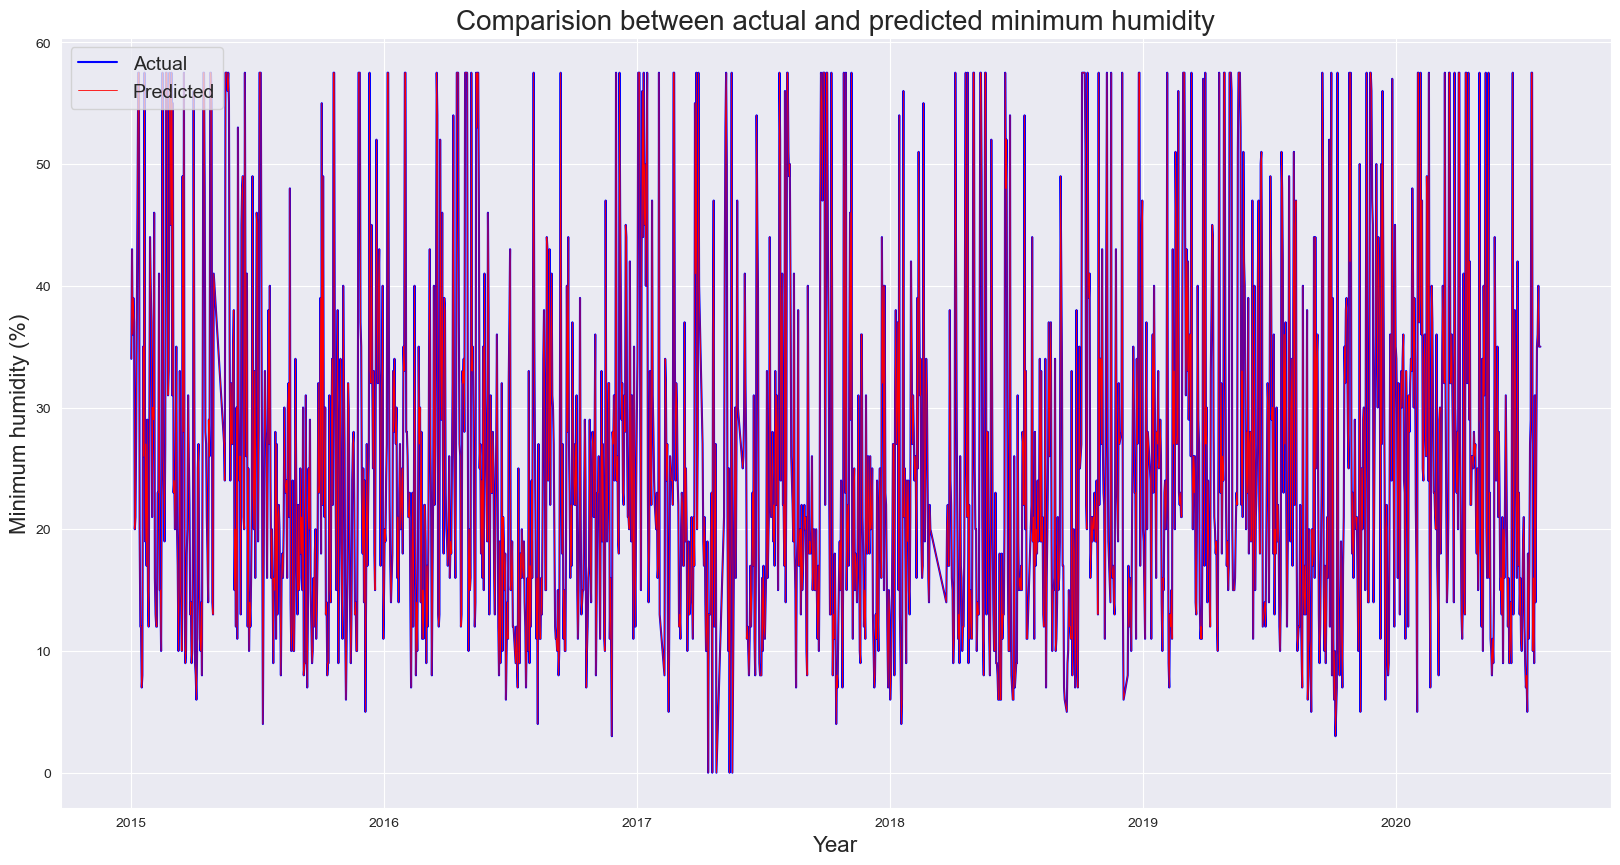

In [667]:
plt.figure(figsize = (20, 10))
plt.plot(min_humidity_predictions.index, min_humidity_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(min_humidity_predictions.index, min_humidity_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Minimum humidity (%)', fontsize = 16)
plt.title('Comparision between actual and predicted minimum humidity', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICITNG AVERAGE HUMIDITY :

>##### DATA PREPROCESSING :

In [668]:
weather['Avg_humidity_target'] = weather.shift(-1)['Average humidity (%)']

In [669]:
weather = weather.ffill()

In [670]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  Avg_temp_target  Max_humidity_target  \
Date                                                                
2020-07-24             55.1             62.8                 90.0   
2020-07-25             50.5             60.6                 90.0   
2020-07-26             43.6             61.7                 96.0   
2020-07-27             46.0             60.5                 94.0   
2020-07-28             46.0             60.5                 94.0   

            Min_humidity_target  Avg_humidity_target  
Date                                                  
2020-07-24                 36.0                 60.0  
2020-07-25                 40.0                 68.0  
2020-07-26                 35.0                 64.0  
2020-07-27                 35.0                 61.0  
2020-07-28                 35.0                 61.0

>##### IMPLEMETING RIDGE REGRESSSION : 

In [671]:
ridge_reg = Ridge(alpha = 0.1)

In [672]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)'])]

In [673]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Avg_humidity_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Avg_humidity_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [674]:
avg_humidity_predictions = back_testing(weather, ridge_reg, predictors)

In [675]:
avg_humidity_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    61.0   61.000000  4.652221e-07
2015-01-02    56.0   56.000012  1.233670e-05
2015-01-03    47.0   47.000014  1.352185e-05
2015-01-04    50.0   50.000008  7.831093e-06
2015-01-05    48.0   48.000004  4.460548e-06
...            ...         ...           ...
2020-07-24    60.0   60.000001  8.601787e-07
2020-07-25    68.0   67.999999  1.036112e-06
2020-07-26    64.0   64.000002  1.664011e-06
2020-07-27    61.0   61.000005  4.853698e-06
2020-07-28    61.0   61.000005  4.636744e-06

[1946 rows x 3 columns]

In [676]:
mean_absolute_error(avg_humidity_predictions['Actual'], avg_humidity_predictions['Prediction'])

4.690138479330161e-06

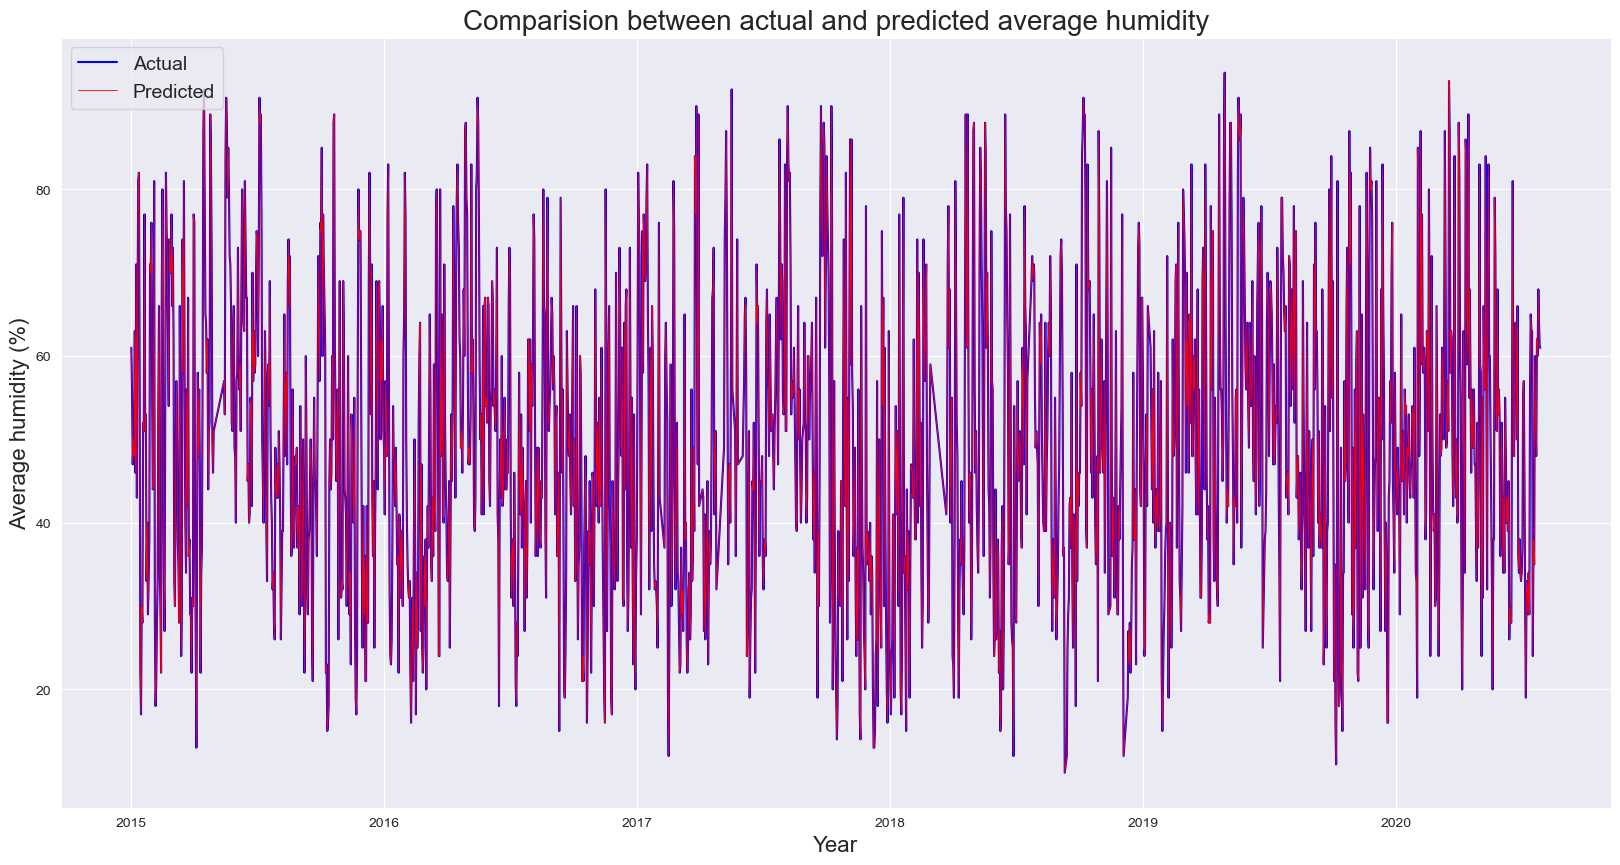

In [677]:
plt.figure(figsize = (20, 10))
plt.plot(avg_humidity_predictions.index, avg_humidity_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(avg_humidity_predictions.index, avg_humidity_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average humidity (%)', fontsize = 16)
plt.title('Comparision between actual and predicted average humidity', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

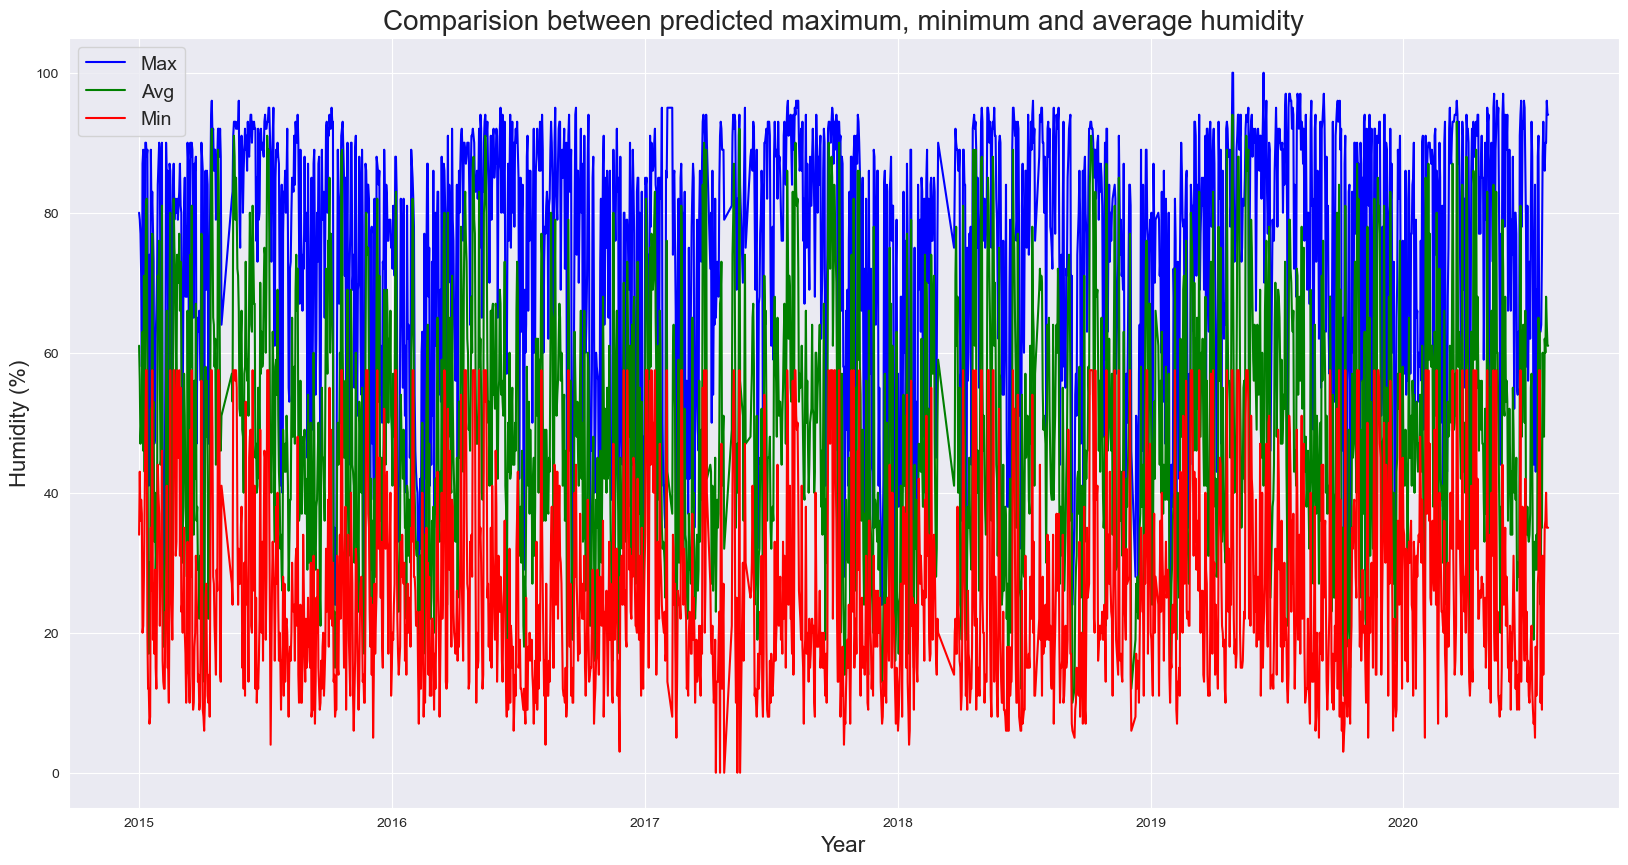

In [678]:
plt.figure(figsize = (20, 10))
plt.plot(avg_humidity_predictions.index, max_humidity_predictions['Prediction'], color = 'blue', label = 'Max')
plt.plot(avg_humidity_predictions.index, avg_humidity_predictions['Prediction'], color = 'green',  label = 'Avg')
plt.plot(avg_humidity_predictions.index, min_humidity_predictions['Prediction'], color = 'red', label = 'Min')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Humidity (%)', fontsize = 16)
plt.title('Comparision between predicted maximum, minimum and average humidity', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING MAXIMUM PRESSURE :

>##### DATA PREPROCESSING :

In [679]:
weather['Max_pressure_target'] = weather.shift(-1)['Maximum pressure']

In [680]:
weather = weather.ffill()

In [681]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  Maximum pressure  \
Date                                                                       
2020-07-24                  86.0                  35.0            29.686   
2020-07-25                  90.0                  36.0            29.781   
2020-07-26                  90.0                  40.0            29.930   
2020-07-27                  96.0                  35.0            29.941   
2020-07-28                  94.0                  35.0            29.792   

            Minimum pressure  Maximum windspeed (mph)  Max_temp_target  \
Date                                                                     
2020-07-24            29.577                     15.0             69.2   
2020-07-25            29.645                      8.1             71.9   
2020-07-26            29.745                     11.5             77.3   
2020-07-27            29.781                     13.8             75.6   
2020-07-28            29.675                     17.3             75.6   

            Min_temp_target  Avg_temp_target  Max_humidity_target  \
Date                                                                
2020-07-24             55.1             62.8                 90.0   
2020-07-25             50.5             60.6                 90.0   
2020-07-26             43.6             61.7                 96.0   
2020-07-27             46.0             60.5                 94.0   
2020-07-28             46.0             60.5                 94.0   

            Min_humidity_target  Avg_humidity_target  Max_pressure_target  
Date                                                                       
2020-07-24                 36.0                 60.0               29.781  
2020-07-25                 40.0                 68.0               29.930  
2020-07-26                 35.0                 64.0               29.941  
2020-07-27                 35.0                 61.0               29.792  
2020-07-28                 35.0                 61.0               29.792

>##### IMPLEMETING RIDGE REGRESSSION : 

In [682]:
ridge_reg = Ridge(alpha = 0.1)

In [683]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Maximum pressure'])]

In [684]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Max_pressure_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Max_pressure_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [685]:
max_pressure_predictions = back_testing(weather, ridge_reg, predictors)

In [686]:
max_pressure_predictions

Actual  Prediction  Difference
Date                                      
2015-01-01  30.383   30.383119    0.000119
2015-01-02  30.266   30.266158    0.000158
2015-01-03  30.364   30.363581    0.000419
2015-01-04  30.253   30.252725    0.000275
2015-01-05  30.296   30.295458    0.000542
...            ...         ...         ...
2020-07-24  29.781   29.780990    0.000010
2020-07-25  29.930   29.929941    0.000059
2020-07-26  29.941   29.941041    0.000041
2020-07-27  29.792   29.792201    0.000201
2020-07-28  29.792   29.792150    0.000150

[1946 rows x 3 columns]

In [687]:
mean_absolute_error(max_pressure_predictions['Actual'], max_pressure_predictions['Prediction'])

0.0001922795453813904

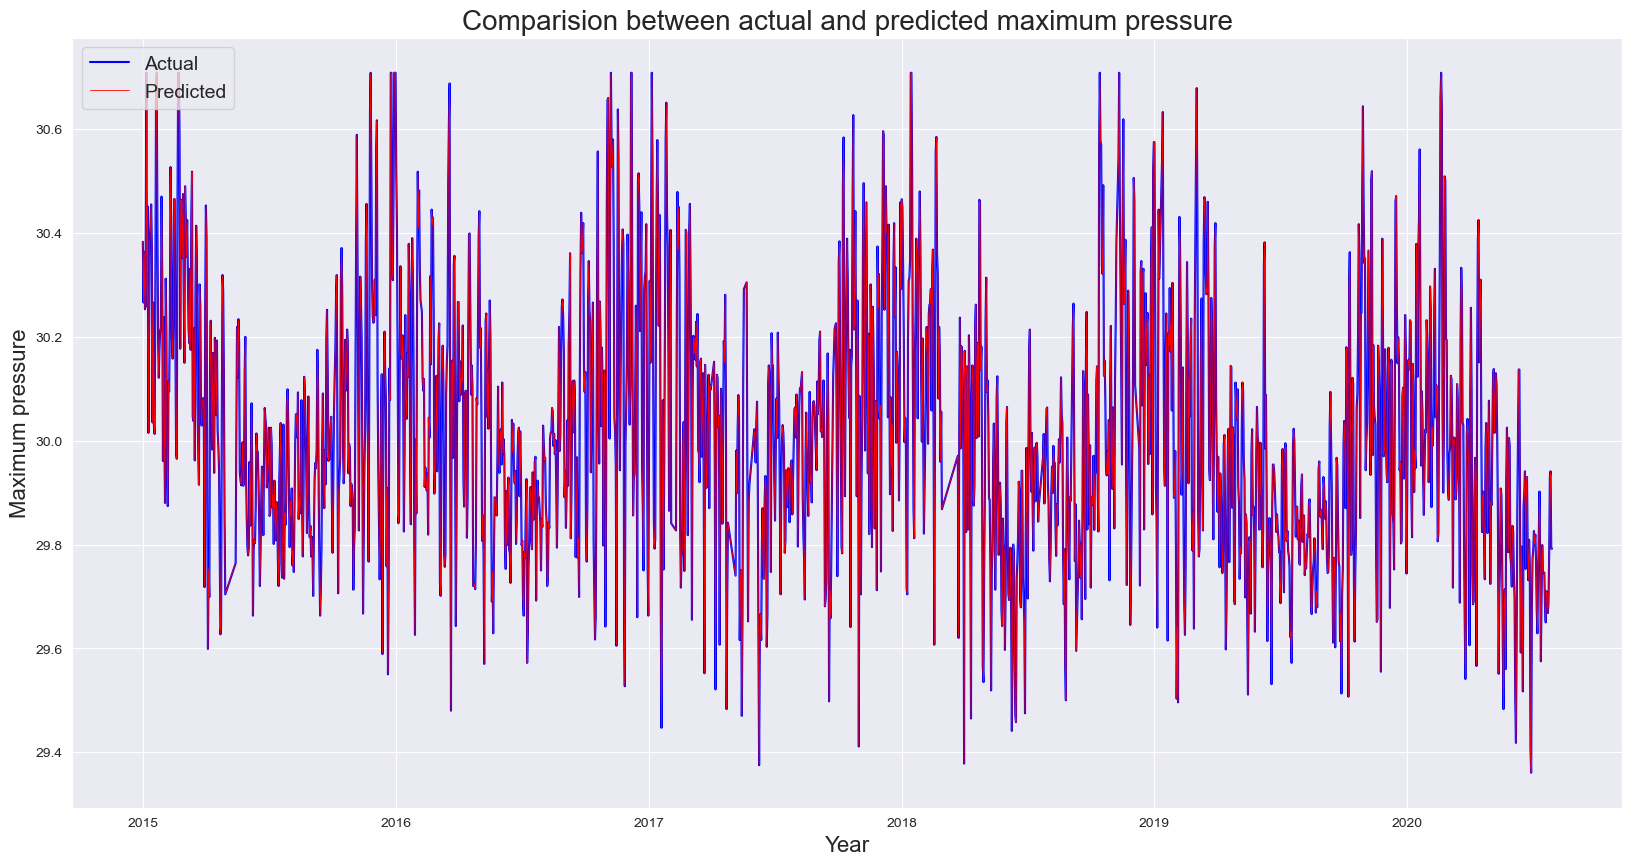

In [688]:
plt.figure(figsize = (20, 10))
plt.plot(max_pressure_predictions.index, max_pressure_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(max_pressure_predictions.index, max_pressure_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Maximum pressure', fontsize = 16)
plt.title('Comparision between actual and predicted maximum pressure', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING MINIMUM PRESSURE :

>##### DATA PREPROCESSING :

In [689]:
weather['Min_pressure_target'] = weather.shift(-1)['Minimum pressure']

In [690]:
weather = weather.ffill()

In [691]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  Minimum pressure  \
Date                                                    ...                     
2020-07-24                  86.0                  35.0  ...            29.577   
2020-07-25                  90.0                  36.0  ...            29.645   
2020-07-26                  90.0                  40.0  ...            29.745   
2020-07-27                  96.0                  35.0  ...            29.781   
2020-07-28                  94.0                  35.0  ...            29.675   

            Maximum windspeed (mph)  Max_temp_target  Min_temp_target  \
Date                                                                    
2020-07-24                     15.0             69.2             55.1   
2020-07-25                      8.1             71.9             50.5   
2020-07-26                     11.5             77.3             43.6   
2020-07-27                     13.8             75.6             46.0   
2020-07-28                     17.3             75.6             46.0   

            Avg_temp_target  Max_humidity_target  Min_humidity_target  \
Date                                                                    
2020-07-24             62.8                 90.0                 36.0   
2020-07-25             60.6                 90.0                 40.0   
2020-07-26             61.7                 96.0                 35.0   
2020-07-27             60.5                 94.0                 35.0   
2020-07-28             60.5                 94.0                 35.0   

            Avg_humidity_target  Max_pressure_target  Min_pressure_target  
Date                                                                       
2020-07-24                 60.0               29.781               29.645  
2020-07-25                 68.0               29.930               29.745  
2020-07-26                 64.0               29.941               29.781  
2020-07-27                 61.0               29.792               29.675  
2020-07-28                 61.0               29.792               29.675  

[5 rows x 21 columns]

>##### IMPLEMETING RIDGE REGRESSSION : 

In [692]:
ridge_reg = Ridge(alpha = 0.1)

In [693]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Minimum pressure'])]

In [694]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Min_pressure_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Min_pressure_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [695]:
min_pressure_predictions = back_testing(weather, ridge_reg, predictors)

In [696]:
min_pressure_predictions

Actual  Prediction  Difference
Date                                      
2015-01-01  29.882   29.882357    0.000357
2015-01-02  29.742   29.742393    0.000393
2015-01-03  30.139   30.138401    0.000599
2015-01-04  29.855   29.855408    0.000408
2015-01-05  30.086   30.085806    0.000194
...            ...         ...         ...
2020-07-24  29.645   29.644879    0.000121
2020-07-25  29.745   29.744960    0.000040
2020-07-26  29.781   29.780858    0.000142
2020-07-27  29.675   29.674833    0.000167
2020-07-28  29.675   29.674807    0.000193

[1946 rows x 3 columns]

In [697]:
mean_absolute_error(min_pressure_predictions['Actual'], min_pressure_predictions['Prediction'])

0.00021520922282405267

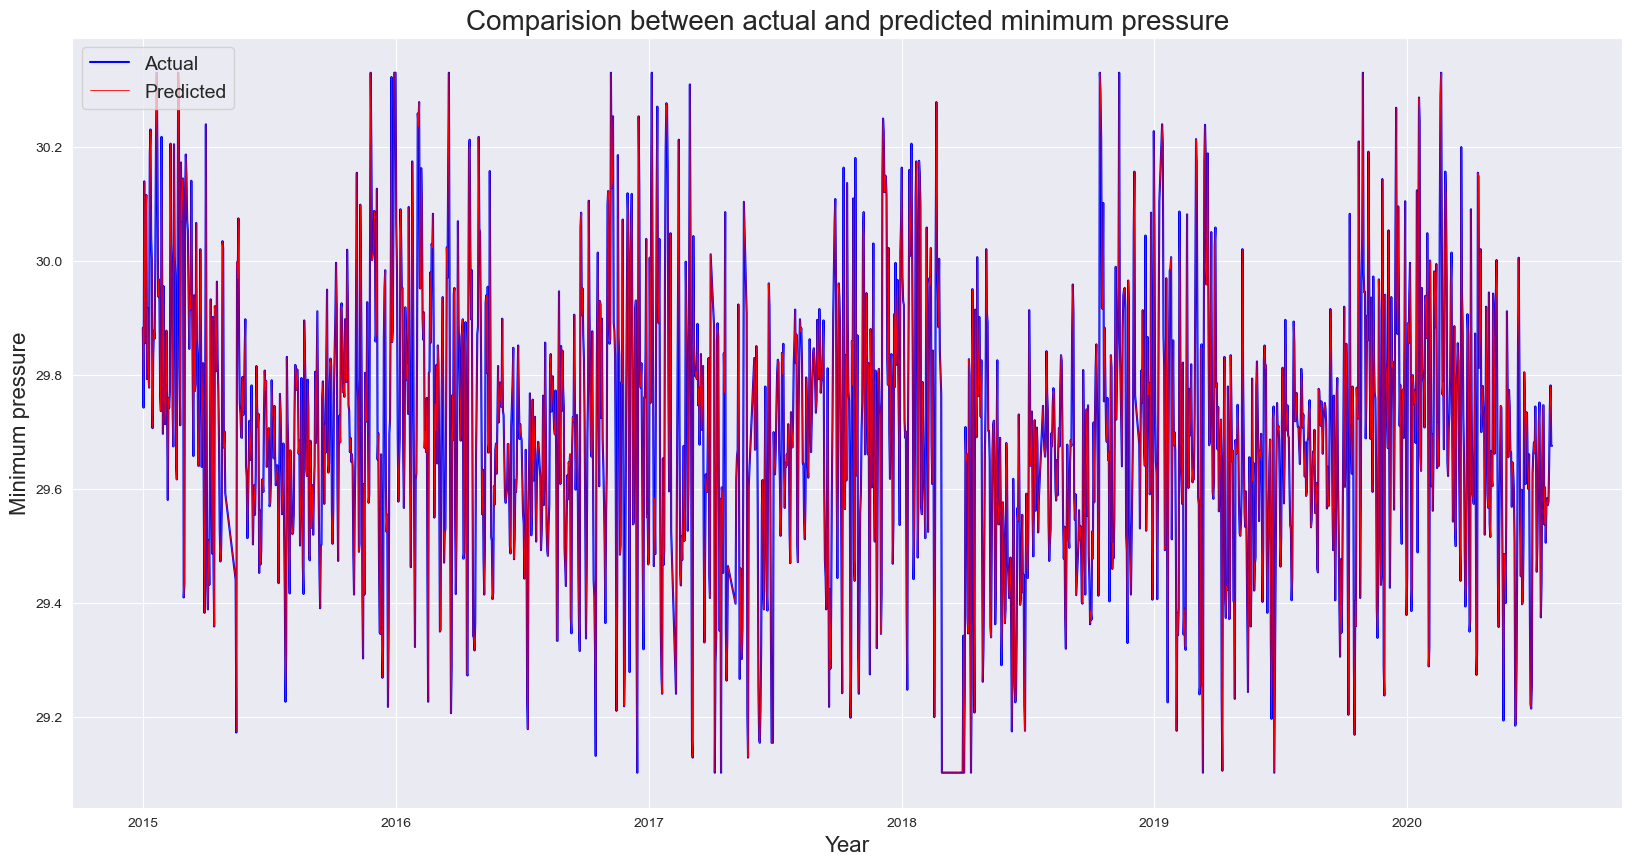

In [698]:
plt.figure(figsize = (20, 10))
plt.plot(min_pressure_predictions.index, min_pressure_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(min_pressure_predictions.index, min_pressure_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Minimum pressure', fontsize = 16)
plt.title('Comparision between actual and predicted minimum pressure', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICITNG AVERAGE PRESSURE :

>##### DATA PREPROCESSING :

In [699]:
weather['Avg_pressure_target'] = weather.shift(-1)['Average barometer (in)']

In [700]:
weather = weather.ffill()

In [701]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  \
Date                                                    ...   
2020-07-24                  86.0                  35.0  ...   
2020-07-25                  90.0                  36.0  ...   
2020-07-26                  90.0                  40.0  ...   
2020-07-27                  96.0                  35.0  ...   
2020-07-28                  94.0                  35.0  ...   

            Maximum windspeed (mph)  Max_temp_target  Min_temp_target  \
Date                                                                    
2020-07-24                     15.0             69.2             55.1   
2020-07-25                      8.1             71.9             50.5   
2020-07-26                     11.5             77.3             43.6   
2020-07-27                     13.8             75.6             46.0   
2020-07-28                     17.3             75.6             46.0   

            Avg_temp_target  Max_humidity_target  Min_humidity_target  \
Date                                                                    
2020-07-24             62.8                 90.0                 36.0   
2020-07-25             60.6                 90.0                 40.0   
2020-07-26             61.7                 96.0                 35.0   
2020-07-27             60.5                 94.0                 35.0   
2020-07-28             60.5                 94.0                 35.0   

            Avg_humidity_target  Max_pressure_target  Min_pressure_target  \
Date                                                                        
2020-07-24                 60.0               29.781               29.645   
2020-07-25                 68.0               29.930               29.745   
2020-07-26                 64.0               29.941               29.781   
2020-07-27                 61.0               29.792               29.675   
2020-07-28                 61.0               29.792               29.675   

            Avg_pressure_target  
Date                             
2020-07-24                 29.7  
2020-07-25                 29.8  
2020-07-26                 29.9  
2020-07-27                 29.7  
2020-0

>##### IMPLEMETING RIDGE REGRESSSION : 

In [702]:
ridge_reg = Ridge(alpha = 0.1)

In [703]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)'])]

In [704]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Avg_pressure_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Avg_pressure_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [705]:
avg_pressure_predictions = back_testing(weather, ridge_reg, predictors)

In [706]:
avg_pressure_predictions

Actual  Prediction  Difference
Date                                      
2015-01-01    30.1   30.101040    0.001040
2015-01-02    29.9   29.902799    0.002799
2015-01-03    30.3   30.298297    0.001703
2015-01-04    30.0   30.001645    0.001645
2015-01-05    30.2   30.199876    0.000124
...            ...         ...         ...
2020-07-24    29.7   29.700092    0.000092
2020-07-25    29.8   29.800442    0.000442
2020-07-26    29.9   29.899404    0.000596
2020-07-27    29.7   29.700337    0.000337
2020-07-28    29.7   29.700337    0.000337

[1946 rows x 3 columns]

In [707]:
mean_absolute_error(avg_pressure_predictions['Actual'], avg_pressure_predictions['Prediction'])

0.0006486610040492033

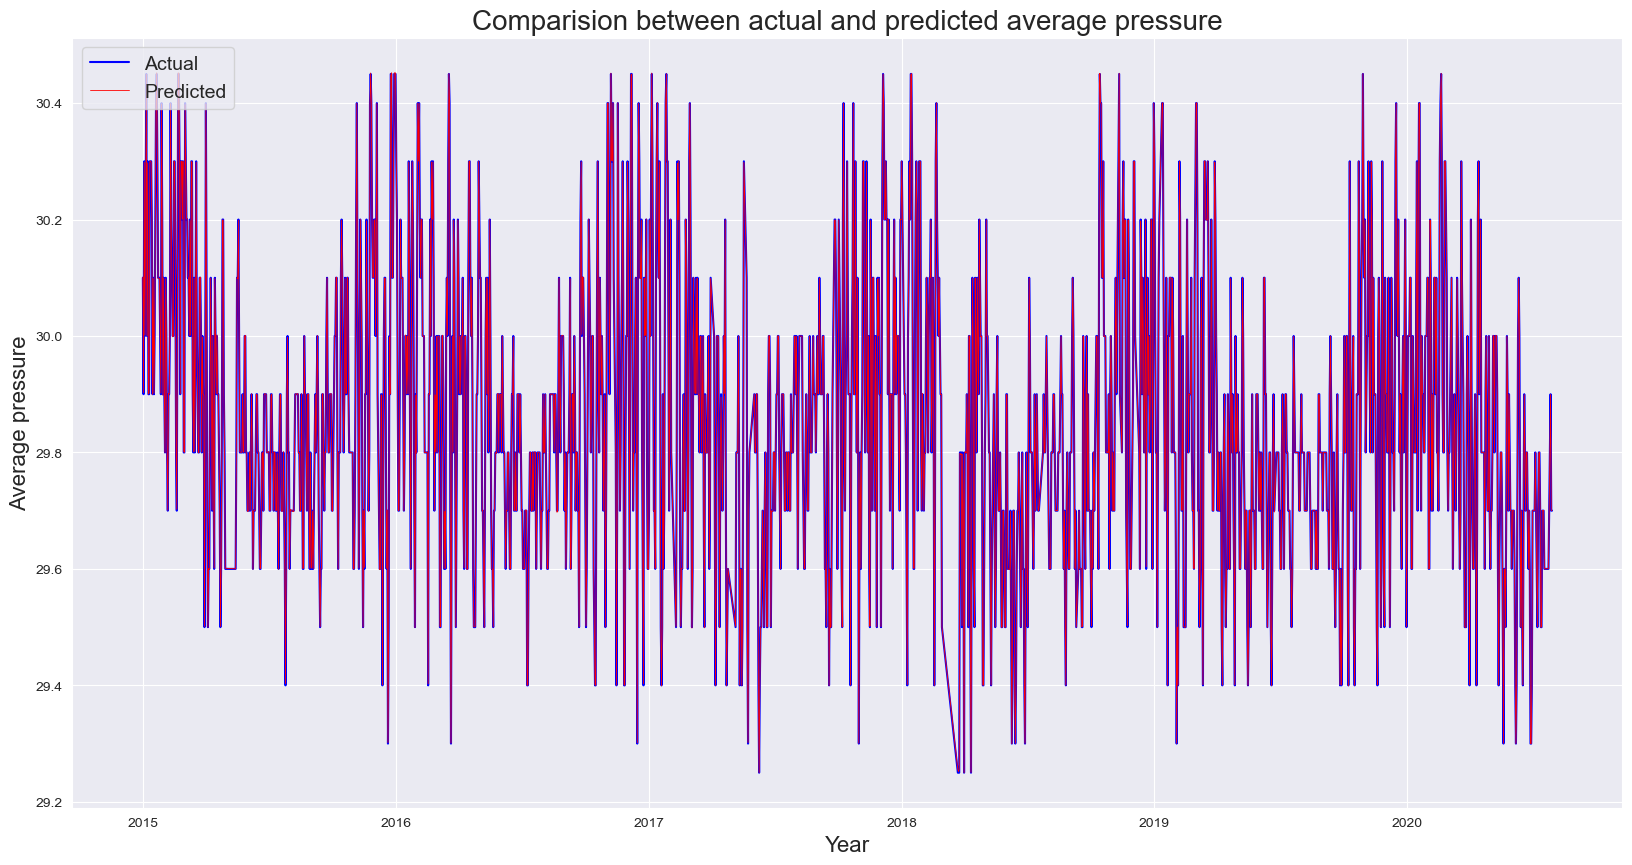

In [708]:
plt.figure(figsize = (20, 10))
plt.plot(avg_pressure_predictions.index, avg_pressure_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(avg_pressure_predictions.index, avg_pressure_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average pressure', fontsize = 16)
plt.title('Comparision between actual and predicted average pressure', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

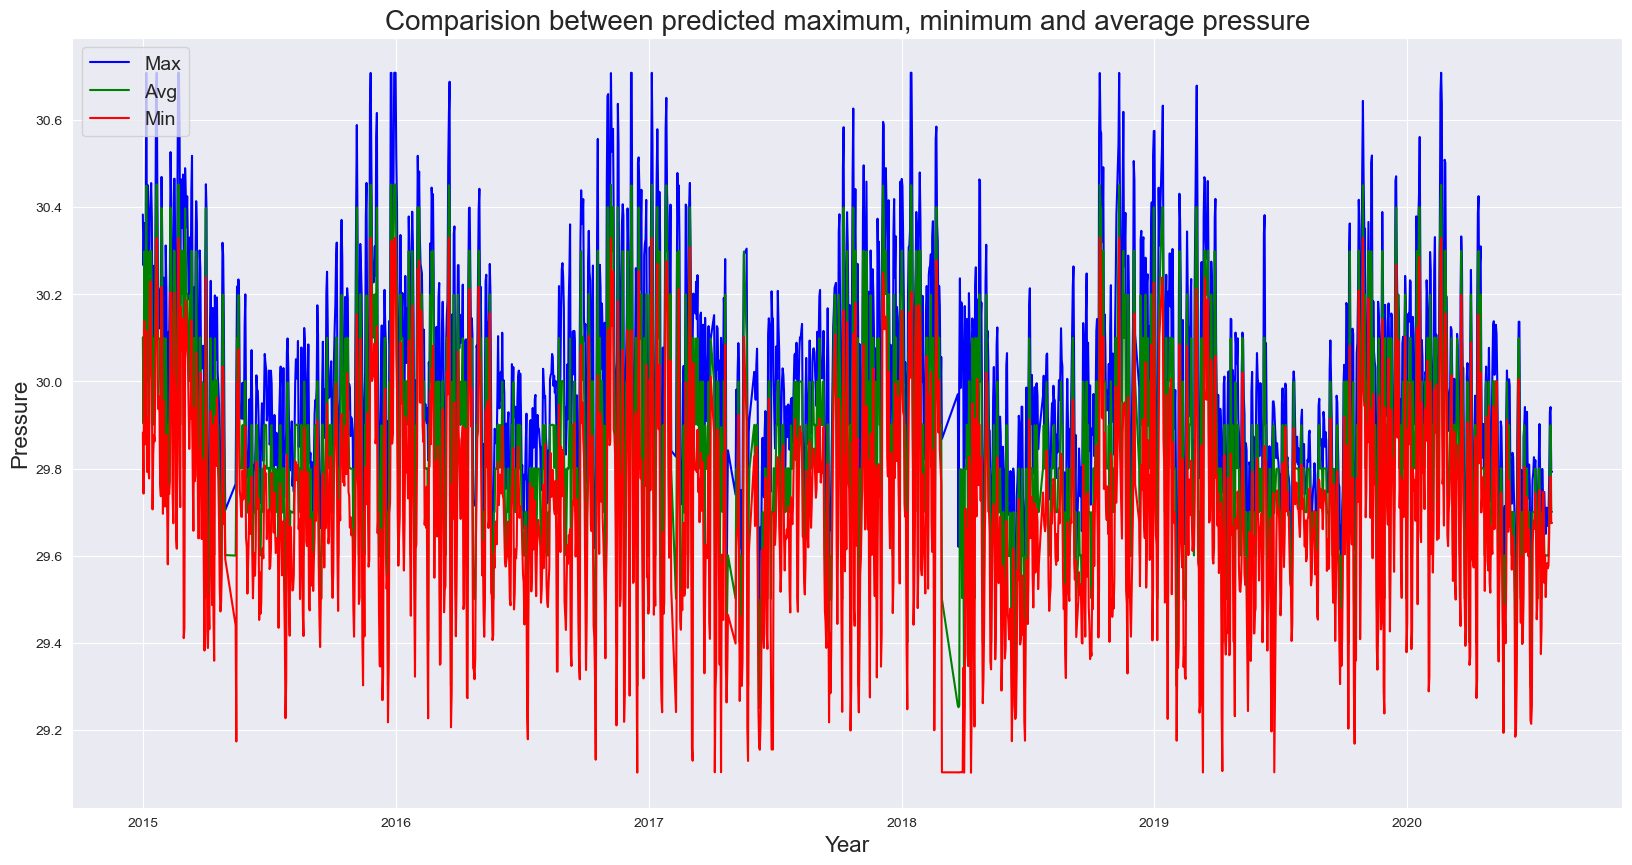

In [709]:
plt.figure(figsize = (20, 10))
plt.plot(avg_pressure_predictions.index, max_pressure_predictions['Prediction'], color = 'blue', label = 'Max')
plt.plot(avg_pressure_predictions.index, avg_pressure_predictions['Prediction'], color = 'green',  label = 'Avg')
plt.plot(avg_pressure_predictions.index, min_pressure_predictions['Prediction'], color = 'red', label = 'Min')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Pressure', fontsize = 16)
plt.title('Comparision between predicted maximum, minimum and average pressure', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING MAXIMUM WINDSPEED :

>##### DATA PREPROCESSING :

In [710]:
weather['Max_windspeed_target'] = weather.shift(-1)['Maximum windspeed (mph)']

In [711]:
weather = weather.ffill()

In [712]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  Max_temp_target  \
Date                                                    ...                    
2020-07-24                  86.0                  35.0  ...             69.2   
2020-07-25                  90.0                  36.0  ...             71.9   
2020-07-26                  90.0                  40.0  ...             77.3   
2020-07-27                  96.0                  35.0  ...             75.6   
2020-07-28                  94.0                  35.0  ...             75.6   

            Min_temp_target  Avg_temp_target  Max_humidity_target  \
Date                                                                
2020-07-24             55.1             62.8                 90.0   
2020-07-25             50.5             60.6                 90.0   
2020-07-26             43.6             61.7                 96.0   
2020-07-27             46.0             60.5                 94.0   
2020-07-28             46.0             60.5                 94.0   

            Min_humidity_target  Avg_humidity_target  Max_pressure_target  \
Date                                                                        
2020-07-24                 36.0                 60.0               29.781   
2020-07-25                 40.0                 68.0               29.930   
2020-07-26                 35.0                 64.0               29.941   
2020-07-27                 35.0                 61.0               29.792   
2020-07-28                 35.0                 61.0               29.792   

            Min_pressure_target  Avg_pressure_target  Max_windspeed_target  
Date                                                                        
2020-07-24               29.645                 29.7                   8.1  
2020-07-25               29.745                 29.8                  11.5  
2020-07-26               29.781                 29.9                  13.8  
2020-07-27               29.675                 29.7                  17.3  
2020-07-28               29.675                 29.7                  17.3  

[5 rows x 23 columns]

>##### IMPLEMETING RIDGE REGRESSSION : 

In [713]:
ridge_reg = Ridge(alpha = 0.1)

In [714]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Maximum windspeed (mph)'])]

In [715]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Max_windspeed_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Max_windspeed_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [716]:
max_windspeed_predictions = back_testing(weather, ridge_reg, predictors)

In [717]:
max_windspeed_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01    13.8   13.800008  7.599311e-06
2015-01-02    18.4   18.400003  2.918365e-06
2015-01-03    28.8   28.799986  1.388479e-05
2015-01-04    36.8   36.799980  2.047242e-05
2015-01-05    24.2   24.199995  4.843165e-06
...            ...         ...           ...
2020-07-24     8.1    8.100008  7.766336e-06
2020-07-25    11.5   11.500003  2.586452e-06
2020-07-26    13.8   13.799999  6.893171e-07
2020-07-27    17.3   17.299997  2.759588e-06
2020-07-28    17.3   17.299997  2.771840e-06

[1946 rows x 3 columns]

In [718]:
mean_absolute_error(max_windspeed_predictions['Actual'], max_windspeed_predictions['Prediction'])

4.589955243204982e-06

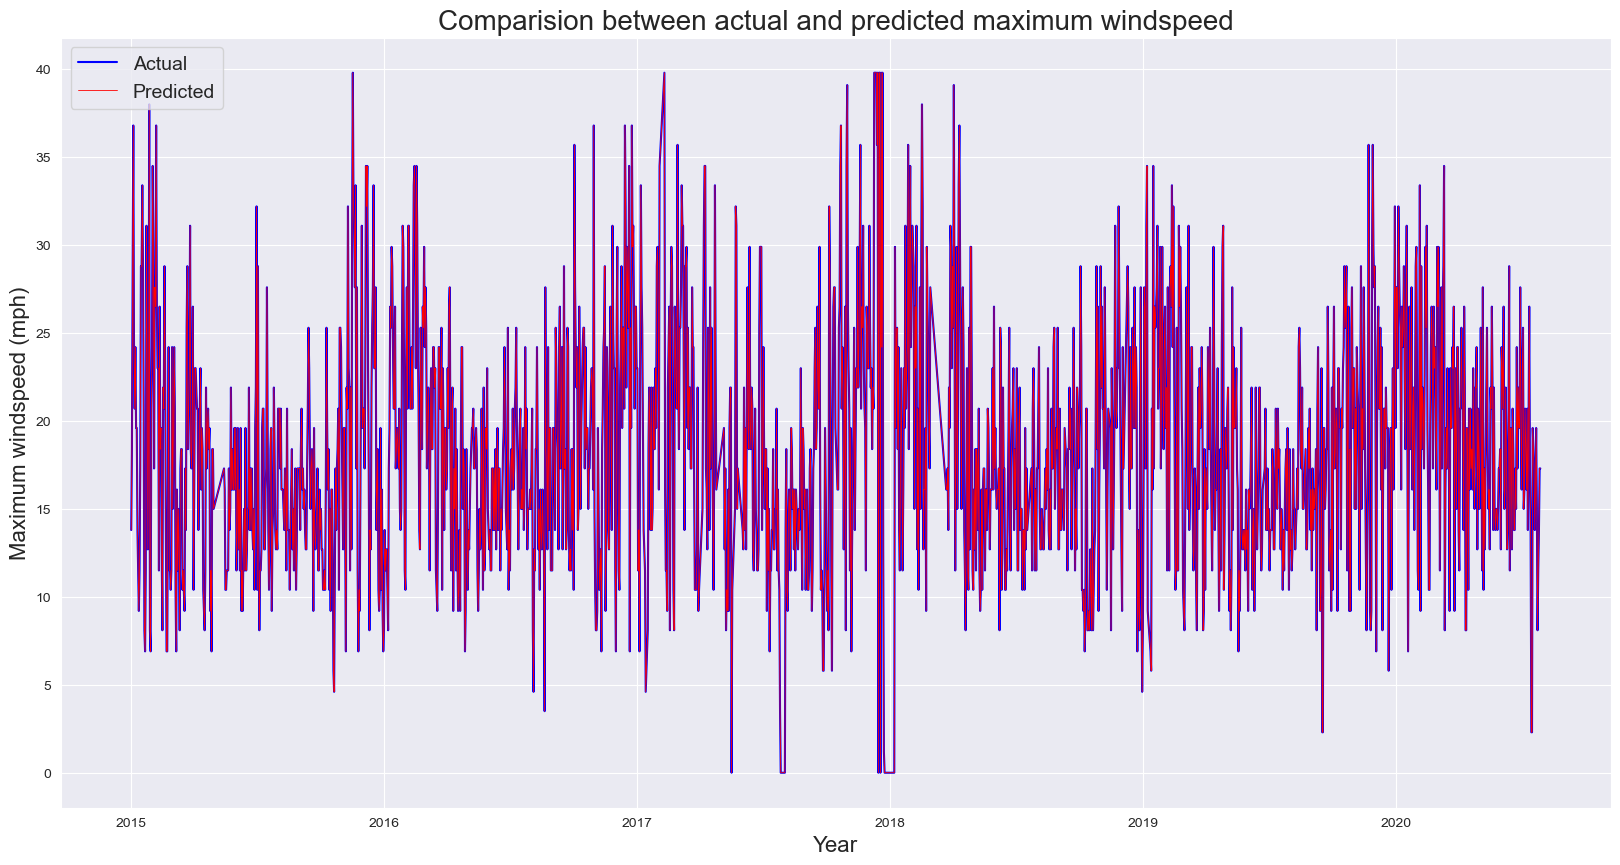

In [719]:
plt.figure(figsize = (20, 10))
plt.plot(max_windspeed_predictions.index, max_windspeed_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(max_windspeed_predictions.index, max_windspeed_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Maximum windspeed (mph)', fontsize = 16)
plt.title('Comparision between actual and predicted maximum windspeed', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICITNG AVERAGE WINDSPEED :

>##### DATA PREPROCESSING :

In [720]:
weather['Avg_windspeed_target'] = weather.shift(-1)['Average windspeed (mph)']

In [721]:
weather = weather.ffill()

In [722]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  Min_temp_target  \
Date                                                    ...                    
2020-07-24                  86.0                  35.0  ...             55.1   
2020-07-25                  90.0                  36.0  ...             50.5   
2020-07-26                  90.0                  40.0  ...             43.6   
2020-07-27                  96.0                  35.0  ...             46.0   
2020-07-28                  94.0                  35.0  ...             46.0   

            Avg_temp_target  Max_humidity_target  Min_humidity_target  \
Date                                                                    
2020-07-24             62.8                 90.0                 36.0   
2020-07-25             60.6                 90.0                 40.0   
2020-07-26             61.7                 96.0                 35.0   
2020-07-27             60.5                 94.0                 35.0   
2020-07-28             60.5                 94.0                 35.0   

            Avg_humidity_target  Max_pressure_target  Min_pressure_target  \
Date                                                                        
2020-07-24                 60.0               29.781               29.645   
2020-07-25                 68.0               29.930               29.745   
2020-07-26                 64.0               29.941               29.781   
2020-07-27                 61.0               29.792               29.675   
2020-07-28                 61.0               29.792               29.675   

            Avg_pressure_target  Max_windspeed_target  Avg_windspeed_target  
Date                                                                         
2020-07-24                 29.7                   8.1                   2.5  
2020-07-25                 29.8                  11.5                   1.7  
2020-07-26                 29.9                  13.8                   2.2  
2020-07-27                 29.7                  17.3                   4.0  
2020-07-28                 29.7                  17.3                   4.0  

[5 rows x 24 columns]

>##### IMPLEMETING RIDGE REGRESSSION : 

In [723]:
ridge_reg = Ridge(alpha = 0.1)

In [724]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)'])]

In [725]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Avg_windspeed_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Avg_windspeed_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [726]:
avg_windspeed_predictions = back_testing(weather, ridge_reg, predictors)

In [727]:
avg_windspeed_predictions

Actual  Prediction  Difference
Date                                      
2015-01-01    3.10    3.100008    0.000008
2015-01-02    7.40    7.399975    0.000025
2015-01-03   11.30   11.299978    0.000022
2015-01-04   15.95   15.949962    0.000038
2015-01-05    9.90    9.899997    0.000003
...            ...         ...         ...
2020-07-24    2.50    2.499999    0.000001
2020-07-25    1.70    1.700005    0.000005
2020-07-26    2.20    2.199998    0.000002
2020-07-27    4.00    3.999995    0.000005
2020-07-28    4.00    3.999996    0.000004

[1946 rows x 3 columns]

In [728]:
mean_absolute_error(avg_windspeed_predictions['Actual'], avg_windspeed_predictions['Prediction'])

1.3464041137014356e-05

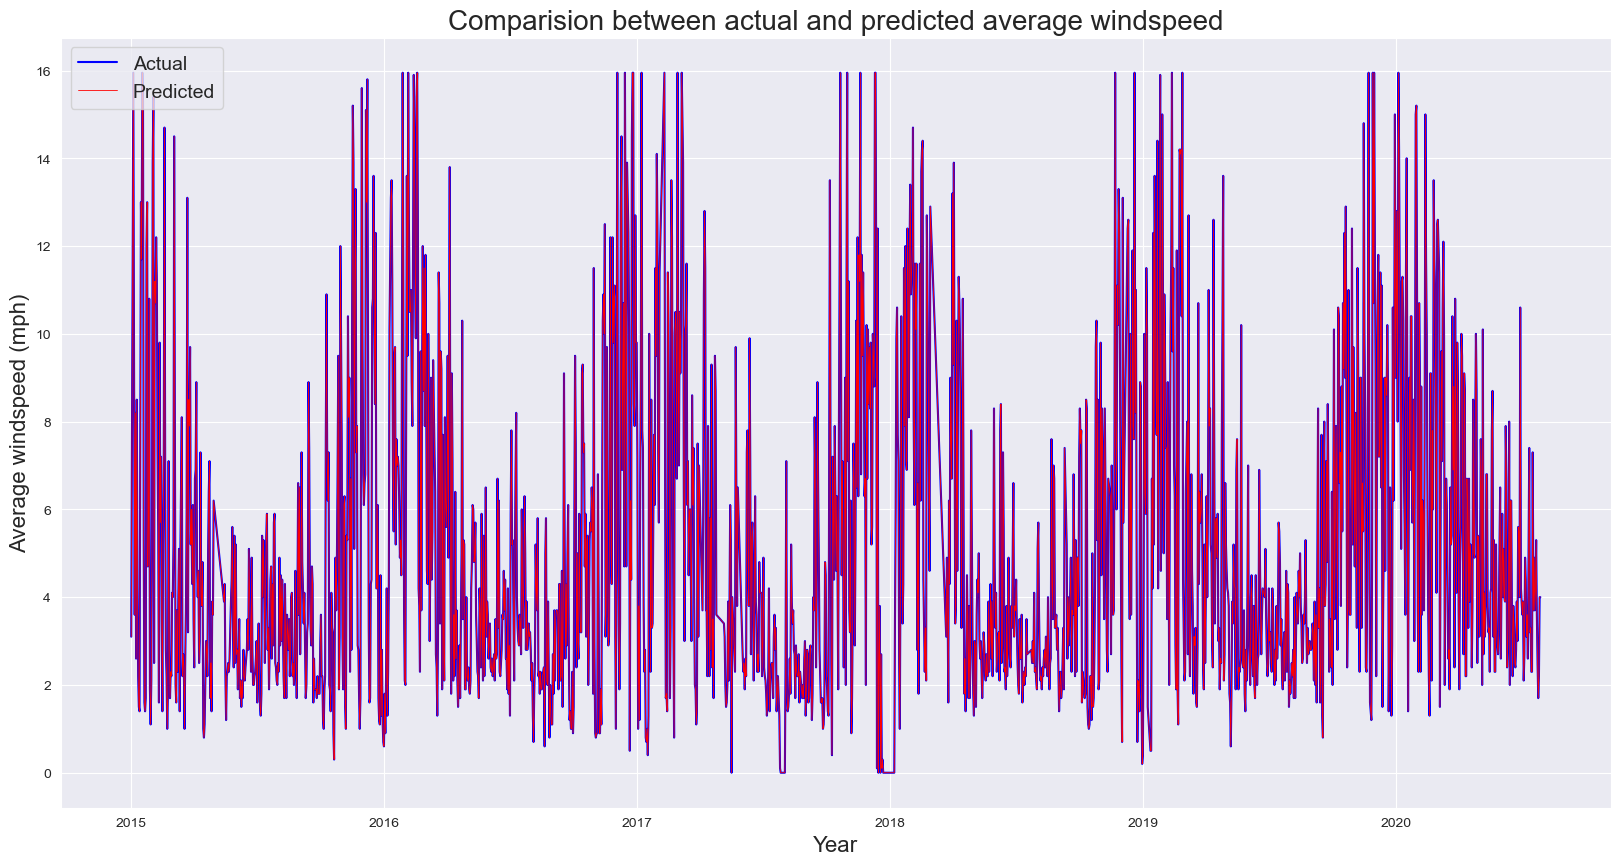

In [729]:
plt.figure(figsize = (20, 10))
plt.plot(avg_windspeed_predictions.index, avg_windspeed_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(avg_windspeed_predictions.index, avg_windspeed_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average windspeed (mph)', fontsize = 16)
plt.title('Comparision between actual and predicted average windspeed', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

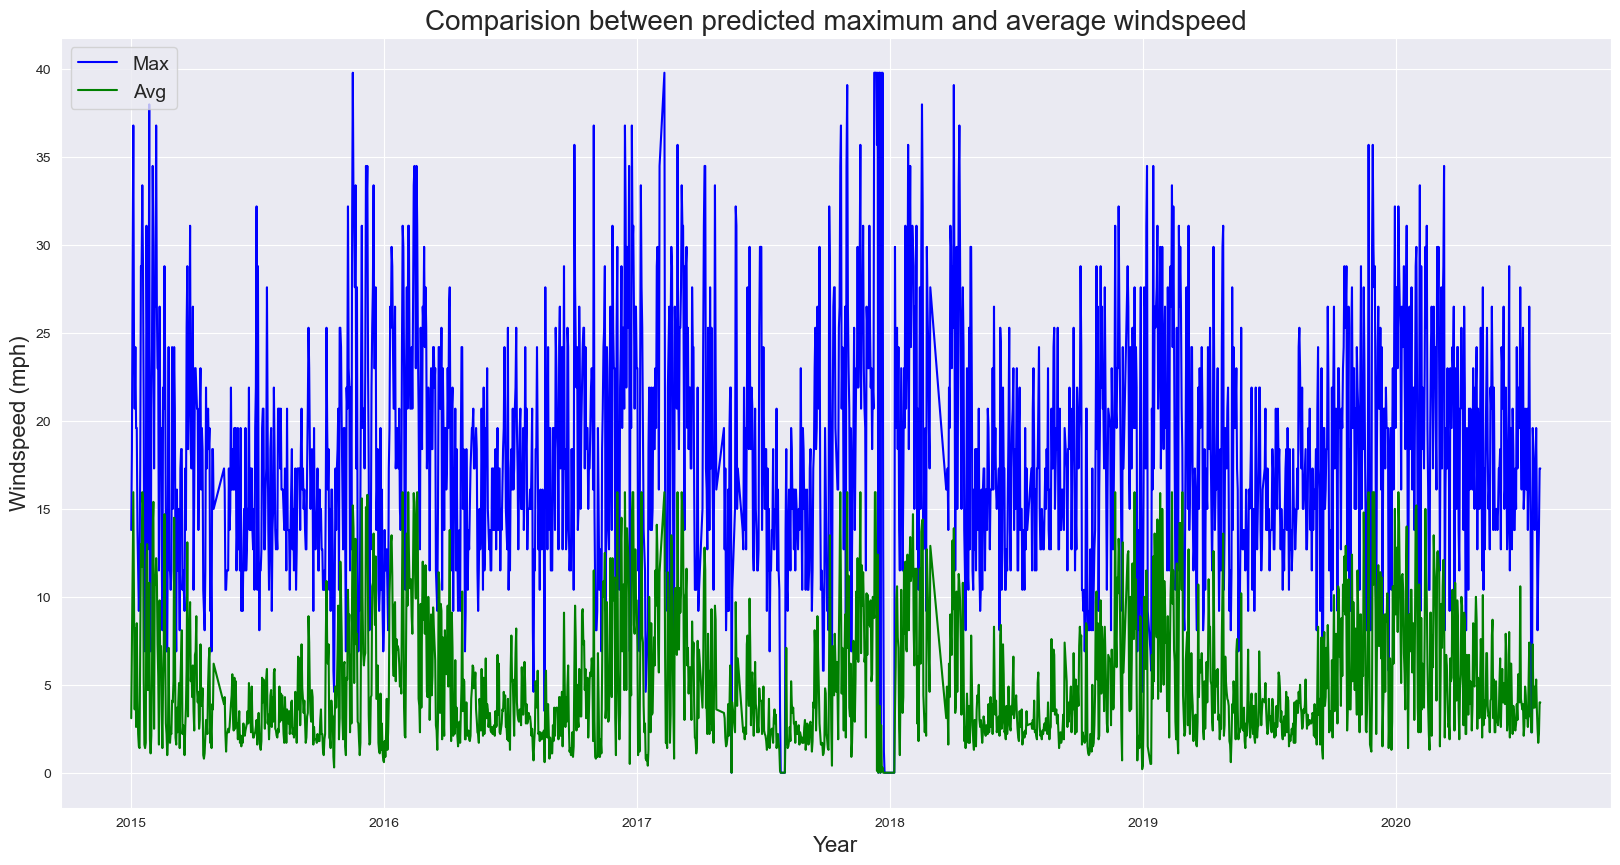

In [730]:
plt.figure(figsize = (20, 10))
plt.plot(avg_windspeed_predictions.index, max_windspeed_predictions['Prediction'], color = 'blue', label = 'Max')
plt.plot(avg_windspeed_predictions.index, avg_windspeed_predictions['Prediction'], color = 'green',  label = 'Avg')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Windspeed (mph)', fontsize = 16)
plt.title('Comparision between predicted maximum and average windspeed', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTING AVERAGE WIND DIRECTION :

>##### DATA PREPROCESSING :

In [731]:
weather['Avg_direction_target'] = weather.shift(-1)['Average direction (°deg)']

In [732]:
weather = weather.ffill()

In [733]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  Avg_temp_target  \
Date                                                    ...                    
2020-07-24                  86.0                  35.0  ...             62.8   
2020-07-25                  90.0                  36.0  ...             60.6   
2020-07-26                  90.0                  40.0  ...             61.7   
2020-07-27                  96.0                  35.0  ...             60.5   
2020-07-28                  94.0                  35.0  ...             60.5   

            Max_humidity_target  Min_humidity_target  Avg_humidity_target  \
Date                                                                        
2020-07-24                 90.0                 36.0                 60.0   
2020-07-25                 90.0                 40.0                 68.0   
2020-07-26                 96.0                 35.0                 64.0   
2020-07-27                 94.0                 35.0                 61.0   
2020-07-28                 94.0                 35.0                 61.0   

            Max_pressure_target  Min_pressure_target  Avg_pressure_target  \
Date                                                                        
2020-07-24               29.781               29.645                 29.7   
2020-07-25               29.930               29.745                 29.8   
2020-07-26               29.941               29.781                 29.9   
2020-07-27               29.792               29.675                 29.7   
2020-07-28               29.792               29.675                 29.7   

            Max_windspeed_target  Avg_windspeed_target  Avg_direction_target  
Date                                                                          
2020-07-24                   8.1                   2.5                 242.0  
2020-07-25                  11.5                   1.7                 357.0  
2020-07-26                  13.8                   2.2                  66.0  
2020-07-27                  17.3                   4.0                 248.0  
2020-07-28                  17.3                   4.0                 248.0  

[5 rows x 25 columns]

>##### IMPLEMETING RIDGE REGRESSSION : 

In [734]:
ridge_reg = Ridge(alpha = 0.1)

In [735]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)'])]

In [736]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Avg_direction_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Avg_direction_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [737]:
avg_direction_predictions = back_testing(weather, ridge_reg, predictors)

In [738]:
avg_direction_predictions

Actual  Prediction    Difference
Date                                        
2015-01-01   275.0  274.999999  6.960577e-07
2015-01-02   242.0  242.000000  4.298529e-07
2015-01-03   237.0  237.000000  1.280728e-07
2015-01-04   247.0  247.000000  6.160639e-08
2015-01-05   247.0  247.000000  2.384989e-07
...            ...         ...           ...
2020-07-24   242.0  242.000000  2.126804e-07
2020-07-25   357.0  356.999999  6.240535e-07
2020-07-26    66.0   66.000000  3.851597e-07
2020-07-27   248.0  248.000000  1.646412e-07
2020-07-28   248.0  248.000000  1.560909e-07

[1946 rows x 3 columns]

In [739]:
mean_absolute_error(avg_direction_predictions['Actual'], avg_direction_predictions['Prediction'])

3.4128252940829223e-07

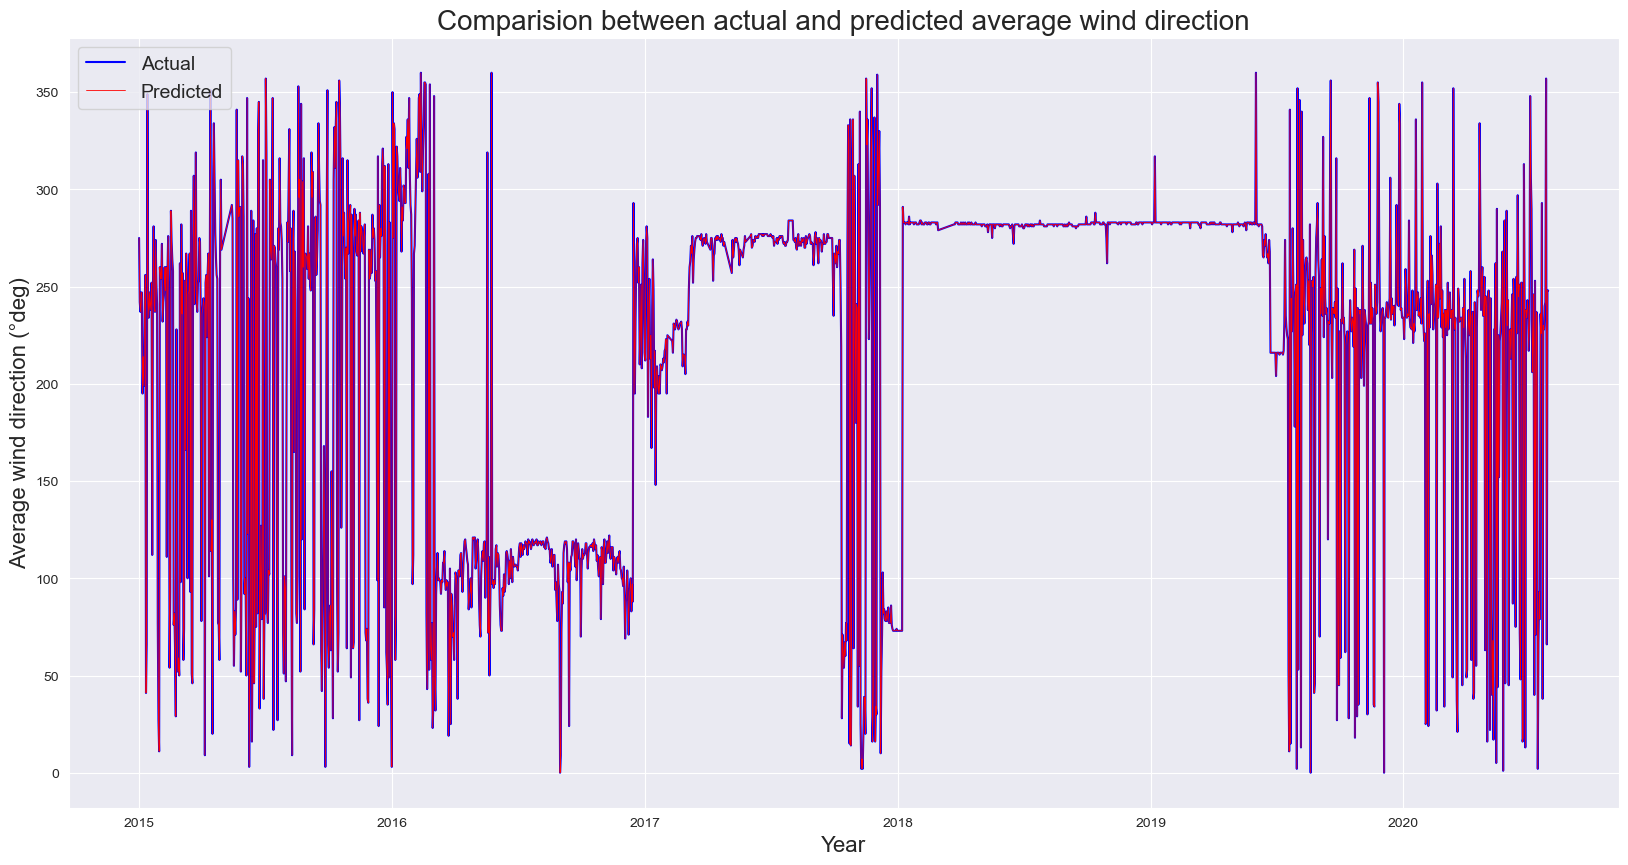

In [740]:
plt.figure(figsize = (20, 10))
plt.plot(avg_direction_predictions.index, avg_direction_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(avg_direction_predictions.index, avg_direction_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average wind direction (°deg)', fontsize = 16)
plt.title('Comparision between actual and predicted average wind direction', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICITNG MONTHLY RAINFALL :

>##### DATA PREPROCESSING :

In [741]:
weather['Rainfall_target'] = weather.shift(-1)['Rainfall for month (in)']

In [742]:
weather = weather.ffill()

In [743]:
weather.tail()

Average temperature (°F)  Average humidity (%)  \
Date                                                         
2020-07-24                      64.1                  62.0   
2020-07-25                      62.8                  60.0   
2020-07-26                      60.6                  68.0   
2020-07-27                      61.7                  64.0   
2020-07-28                      60.5                  61.0   

            Average barometer (in)  Average windspeed (mph)  \
Date                                                          
2020-07-24                    29.6                      3.6   
2020-07-25                    29.7                      2.5   
2020-07-26                    29.8                      1.7   
2020-07-27                    29.9                      2.2   
2020-07-28                    29.7                      4.0   

            Average direction (°deg)  Rainfall for month (in)  \
Date                                                            
2020-07-24                     240.0                     0.24   
2020-07-25                     242.0                     0.33   
2020-07-26                     357.0                     0.33   
2020-07-27                      66.0                     0.33   
2020-07-28                     248.0                     0.35   

            Maximum temperature (°F)  Minimum temperature (°F)  \
Date                                                             
2020-07-24                      74.9                      55.3   
2020-07-25                      69.2                      55.1   
2020-07-26                      71.9                      50.5   
2020-07-27                      77.3                      43.6   
2020-07-28                      75.6                      46.0   

            Maximum humidity (%)  Minimum humidity (%)  ...  \
Date                                                    ...   
2020-07-24                  86.0                  35.0  ...   
2020-07-25                  90.0                  36.0  ...   
2020-07-26                  90.0                  40.0  ...   
2020-07-27                  96.0                  35.0  ...   
2020-07-28                  94.0                  35.0  ...   

            Max_humidity_target  Min_humidity_target  Avg_humidity_target  \
Date                                                                        
2020-07-24                 90.0                 36.0                 60.0   
2020-07-25                 90.0                 40.0                 68.0   
2020-07-26                 96.0                 35.0                 64.0   
2020-07-27                 94.0                 35.0                 61.0   
2020-07-28                 94.0                 35.0                 61.0   

            Max_pressure_target  Min_pressure_target  Avg_pressure_target  \
Date                                                                        
2020-07-24               29.781               29.645                 29.7   
2020-07-25               29.930               29.745                 29.8   
2020-07-26               29.941               29.781                 29.9   
2020-07-27               29.792               29.675                 29.7   
2020-07-28               29.792               29.675                 29.7   

            Max_windspeed_target  Avg_windspeed_target  Avg_direction_target  \
Date                                                                           
2020-07-24                   8.1                   2.5                 242.0   
2020-07-25                  11.5                   1.7                 357.0   
2020-07-26                  13.8                   2.2                  66.0   
2020-07-27                  17.3                   4.0                 248.0   
2020-07-28                  17.3                   4.0                 248.0   

            Rainfall_target  
Date                         
2020-07-24             0.33  
2020-07-25             0.33  
2020-07-26   

>##### IMPLEMETING RIDGE REGRESSSION : 

In [744]:
ridge_reg = Ridge(alpha = 0.1)

In [745]:
predictors = weather.columns[~weather.columns.isin(['Average temperature (°F)', 'Average humidity (%)', 'Average barometer (in)',
             'Average windspeed (mph)', 'Average direction (°deg)', 'Rainfall for month (in)'])]

In [746]:
def back_testing(weather, model, predictors, start = 1956, step = 30):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['Rainfall_target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['Rainfall_target'], preds], axis = 1)
        combined.columns = ['Actual', 'Prediction']
        combined['Difference'] = (combined['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [747]:
rainfall_predictions = back_testing(weather, ridge_reg, predictors)

In [748]:
rainfall_predictions

Actual  Prediction  Difference
Date                                      
2015-01-01    0.01    0.010049    0.000049
2015-01-02    0.01    0.010078    0.000078
2015-01-03    0.01    0.010091    0.000091
2015-01-04    0.02    0.020141    0.000141
2015-01-05    0.02    0.020152    0.000152
...            ...         ...         ...
2020-07-24    0.33    0.330083    0.000083
2020-07-25    0.33    0.330091    0.000091
2020-07-26    0.33    0.330078    0.000078
2020-07-27    0.35    0.350069    0.000069
2020-07-28    0.35    0.350068    0.000068

[1946 rows x 3 columns]

In [749]:
mean_absolute_error(rainfall_predictions['Actual'], rainfall_predictions['Prediction'])

7.395768395241961e-05

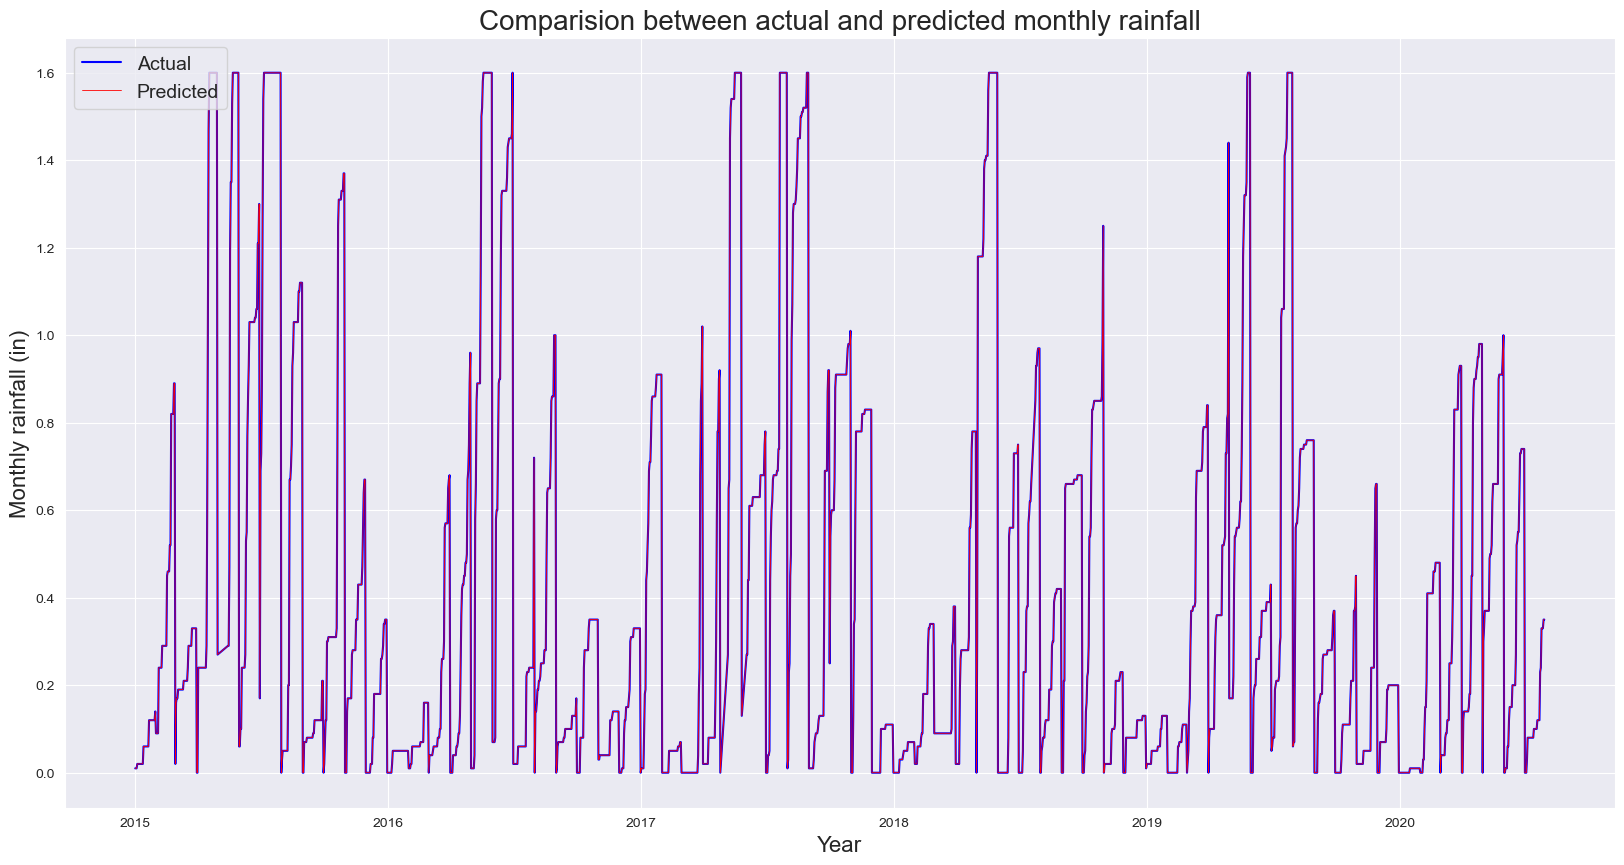

In [750]:
plt.figure(figsize = (20, 10))
plt.plot(rainfall_predictions.index, rainfall_predictions['Actual'], color = 'blue', label = 'Actual')
plt.plot(rainfall_predictions.index, rainfall_predictions['Prediction'], color = 'red', linewidth = 0.6, label = 'Predicted')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Monthly rainfall (in)', fontsize = 16)
plt.title('Comparision between actual and predicted monthly rainfall', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

>### PREDICTED WEATHER DATAFRAME :

In [751]:
predicted_weather = pd.DataFrame({"Max_temp": max_temp_predictions['Prediction'], "Min_temp": min_temp_predictions['Prediction'],
                    "Avg_temp": avg_temp_predictions['Prediction'], "Max_humidity": max_humidity_predictions['Prediction'],
                    "Min_humidity": min_humidity_predictions['Prediction'], "Avg_humidity": avg_humidity_predictions['Prediction'],
                    "Max_pressure": max_pressure_predictions['Prediction'], "Min_pressure": min_pressure_predictions['Prediction'],
                    "Avg_pressure": avg_pressure_predictions['Prediction'], "Max_windspeed": max_windspeed_predictions['Prediction'],
                    "Avg_windspeed": avg_windspeed_predictions['Prediction'], "Avg_wind_direction": avg_direction_predictions['Prediction'],
                    "Daily_rainfall": rainfall_predictions['Prediction']}, index = max_temp_predictions.index)

In [752]:
predicted_weather

Max_temp   Min_temp   Avg_temp  Max_humidity  Min_humidity  \
Date                                                                      
2015-01-01  36.199999   8.799998  20.800021     79.999998     33.999997   
2015-01-02  34.400003   7.900005  24.199967     78.999999     42.999991   
2015-01-03  33.100001  12.299999  26.399954     76.999999     35.999996   
2015-01-04  46.799993  32.199986  38.899997     70.999995     38.999991   
2015-01-05  49.500003  40.299989  44.000000     57.999999     36.999994   
...               ...        ...        ...           ...           ...   
2020-07-24  69.200003  55.099994  62.799990     89.999999     36.000001   
2020-07-25  71.900000  50.499997  60.599999     89.999999     39.999998   
2020-07-26  77.299999  43.600001  61.699993     95.999999     34.999997   
2020-07-27  75.600001  45.999999  60.500000     93.999999     34.999998   
2020-07-28  75.600000  45.999999  60.500001     93.999999     34.999997   

            Avg_humidity  Max_pressure  Min_pressure  Avg_pressure  \
Date                                                                 
2015-01-01     61.000000     30.383119     29.882357     30.101040   
2015-01-02     56.000012     30.266158     29.742393     29.902799   
2015-01-03     47.000014     30.363581     30.138401     30.298297   
2015-01-04     50.000008     30.252725     29.855408     30.001645   
2015-01-05     48.000004     30.295458     30.085806     30.199876   
...                  ...           ...           ...           ...   
2020-07-24     60.000001     29.780990     29.644879     29.700092   
2020-07-25     67.999999     29.929941     29.744960     29.800442   
2020-07-26     64.000002     29.941041     29.780858     29.899404   
2020-07-27     61.000005     29.792201     29.674833     29.700337   
2020-07-28     61.000005     29.792150     29.674807     29.700337   

            Max_windspeed  Avg_windspeed  Avg_wind_direction  Daily_rainfall  
Date                                                                          
2015-01-01      13.800008       3.100008          274.999999        0.010049  
2015-01-02      18.400003       7.399975          242.000000        0.010078  
2015-01-03      28.799986      11.299978          237.000000        0.010091  
2015-01-04      36.799980      15.949962          247.000000        0.020141  
2015-01-05      24.199995       9.899997          247.000000        0.020152  
...                   ...            ...                 ...             ...  
2020-07-24       8.100008       2.499999          242.000000        0.330083  
2020-07-25      11.500003       1.700005          356.999999        0.330091  
2020-07-26      13.799999       2.199998           66.000000        0.330078  
2020-07-27      17.299997       3.999995          248.000000        0.350069  
2020-07-28      17.299997       3.999996          248.000000        0.350068  

[1946 rows x 13 columns]

>### EARLY WARNING OF SEVERE WEATHER :

>##### 1. HEAT WAVE :  

In [753]:
caution = predicted_weather.loc[(predicted_weather['Max_temp'] >= 80) & (predicted_weather['Max_temp'] < 90) &
                                (predicted_weather['Max_humidity'] >= 40) & (predicted_weather['Max_humidity'] < 45)]

In [754]:
extreme_caution = predicted_weather.loc[(predicted_weather['Max_temp'] >= 90) & (predicted_weather['Max_temp'] < 98) &
                                        (predicted_weather['Max_humidity'] >= 40) & (predicted_weather['Max_humidity'] < 75)]

In [755]:
danger = predicted_weather.loc[(predicted_weather['Max_temp'] >= 90) & (predicted_weather['Max_temp'] < 110) &
                               (predicted_weather['Max_humidity'] >= 75) & (predicted_weather['Max_humidity'] <= 100)]

In [756]:
caution = pd.DataFrame({'Maximum temperature (°F)': caution['Max_temp']})
extreme_caution = pd.DataFrame({'Maximum temperature (°F)': extreme_caution['Max_temp']})
danger = pd.DataFrame({'Maximum temperature (°F)': danger['Max_temp']})

In [757]:
print('HEAT WAVE PREDICTION :')
print('Take caution :')
print(caution.to_string())
print('\nTake extreme caution :')
print(extreme_caution.to_string())
print('\nIt is dangerous :')
print(danger.to_string())

HEAT WAVE PREDICTION :
Take caution :
            Maximum temperature (°F)
Date                                
2015-07-24                 80.899998
2015-09-20                 80.299994
2016-07-03                 81.099999
2016-09-10                 81.999992
2017-06-20                 87.199997
2018-06-13                 83.599995
2018-08-23                 84.499993
2019-07-18                 87.099995
2020-07-07                 84.699996
2020-07-10                 83.900000

Take extreme caution :
            Maximum temperature (°F)
Date                                
2016-08-08                 90.699989
2018-06-27                 90.499994
2019-09-01                 91.599996

It is dangerous :
            Maximum temperature (°F)
Date                                
2016-06-20                 92.699988
2020-07-09                 90.699994


>##### 2. URBAN FLOODING :

In [758]:
urban_flood = predicted_weather.loc[predicted_weather['Daily_rainfall'] > 1.575]

In [759]:
urban_flood = pd.DataFrame({'Rainfall (in)': urban_flood['Daily_rainfall']})

In [760]:
print('URBAN FLOOD PREDICTION :')
print(urban_flood.to_string())

URBAN FLOOD PREDICTION :
            Rainfall (in)
Date                     
2015-04-18       1.599663
2015-04-19       1.599614
2015-04-20       1.599622
2015-04-21       1.599621
2015-04-22       1.599613
2015-04-23       1.599619
2015-04-24       1.599664
2015-04-25       1.599684
2015-04-26       1.599726
2015-04-27       1.599711
2015-04-28       1.599685
2015-04-29       1.599632
2015-05-22       1.599768
2015-05-23       1.599736
2015-05-24       1.599729
2015-05-25       1.599696
2015-05-26       1.599709
2015-05-27       1.599685
2015-05-28       1.599665
2015-05-29       1.599709
2015-05-30       1.599729
2015-07-06       1.599839
2015-07-07       1.599837
2015-07-08       1.599830
2015-07-09       1.599767
2015-07-10       1.599724
2015-07-11       1.599685
2015-07-12       1.599719
2015-07-13       1.599769
2015-07-14       1.599756
2015-07-15       1.599732
2015-07-16       1.599698
2015-07-17       1.599696
2015-07-18       1.599742
2015-07-19       1.599747
2015-07-20   

>### BEST CONDITIONS FOR HARVEST PREDICTION :

>##### 1. RICE :

In [761]:
rice = predicted_weather.loc[(predicted_weather['Max_temp'] >= 55) & (predicted_weather['Max_temp'] <= 95) &
                              (predicted_weather['Avg_humidity'] >= 60) & (predicted_weather['Avg_humidity'] >= 80) &
                              (predicted_weather['Daily_rainfall'] >= 0.1) & (predicted_weather['Daily_rainfall'] >= 0.2)]

In [762]:
dates = pd.DataFrame({'Year': rice.index.year, 'Month': rice.index.month})
dates = dates.drop_duplicates()

In [763]:
print('BEST TIME TO GROW RICE :')
print(dates.to_string())

BEST TIME TO GROW RICE :
    Year  Month
0   2015      6
1   2015      7
4   2016      5
5   2017      7
6   2017      8
12  2017      9
13  2018      5
15  2018      6
16  2019      9
17  2020      5
19  2020      6


>##### 2. WHEAT :

In [764]:
wheat = predicted_weather.loc[(predicted_weather['Avg_temp'] >= 60) & (predicted_weather['Max_temp'] <= 75) &
                              (predicted_weather['Daily_rainfall'] >= 0.03) & (predicted_weather['Daily_rainfall'] >= 0.06)]

In [765]:
dates = pd.DataFrame({'Year': wheat.index.year, 'Month': wheat.index.month})
dates = dates.drop_duplicates()

In [766]:
print('BEST TIME TO GROW WHEAT :')
print(dates.to_string())

BEST TIME TO GROW WHEAT :
    Year  Month
0   2015      6
2   2015      7
5   2015      8
7   2015      9
9   2015     10
10  2016      6
12  2016      8
13  2016      9
14  2016     10
17  2017      6
18  2017      7
21  2017      8
23  2017      9
24  2018      5
25  2018      8
27  2018      9
28  2019      6
29  2019      7
35  2019      8
37  2019      9
40  2020      5
41  2020      6
42  2020      7


>##### 3. COTTON :

In [767]:
cotton = predicted_weather.loc[(predicted_weather['Max_temp'] >= 50) & (predicted_weather['Max_temp'] <= 95) &
                              (predicted_weather['Max_humidity'] >= 60) & (predicted_weather['Avg_humidity'] >= 80) &
                              (predicted_weather['Daily_rainfall'] >= 0.05) & (predicted_weather['Daily_rainfall'] >= 0.13)]

In [768]:
dates = pd.DataFrame({'Year': cotton.index.year, 'Month': cotton.index.month})
dates = dates.drop_duplicates()

In [769]:
print('BEST TIME TO GROW WHEAT :')
print(dates.to_string())

BEST TIME TO GROW WHEAT :
    Year  Month
0   2015      5
2   2015      6
3   2015      7
6   2016      5
7   2017      7
8   2017      8
14  2017      9
15  2018      5
18  2018      6
19  2018     10
20  2019      9
21  2020      5
24  2020      6
